In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



Data importation


In [3]:
Airports = pd.read_csv("/Users/quentinfever/Library/CloudStorage/OneDrive-CranfieldUniversity/Assignments/DAV Assignment/Airports.csv", encoding= 'unicode_escape')
Flight_data = pd.read_excel("/Users/quentinfever/Library/CloudStorage/OneDrive-CranfieldUniversity/Assignments/DAV Assignment/Flight Data.xlsx")

Data exploration


In [4]:
Airports.shape

(9049, 5)

In [5]:
Flight_data.columns

Index(['Source', 'Source City', 'Source Country', 'Target', 'Target City',
       'Target Country', 'Weight'],
      dtype='object')

In [6]:
Flight_data = Flight_data.rename(columns={"Source": "Source", "Source City": "SourceCity","Source Country": "SourceCountry", "Target City": "TargetCity","Target Country": "TargetCountry", "Weight": "Weight"})



In [7]:
Flight_data

Source    SourceCity SourceCountry Target    TargetCity TargetCountry  \
0        FNC       Funchal      Portugal    PXO   Porto Santo      Portugal   
1        PXO   Porto Santo      Portugal    FNC       Funchal      Portugal   
2        AEP  Buenos Aires     Argentina    MVD    Montevideo       Uruguay   
3        MVD    Montevideo       Uruguay    AEP  Buenos Aires     Argentina   
4        AEP  Buenos Aires     Argentina    ROS  Rosario (AR)     Argentina   
...      ...           ...           ...    ...           ...           ...   
60465    PFO        Paphos        Cyprus    LCA       Larnaca        Cyprus   
60466    ATH   Athens (GR)        Greece    TIA        Tirana       Albania   
60467    TIA        Tirana       Albania    ATH   Athens (GR)        Greece   
60468    PRN      Pristina    Yugoslavia    TIA        Tirana       Albania   
60469    TIA        Tirana       Albania    PRN      Pristina    Yugoslavia   

       Weight  
0        9864  
1        9864  
2        1463  
3        1463  
4        2261  
...       ...  
60465     945  
60466     128  
60467     128  
60468     208  
60469     208  

[60470 rows x 7 columns]

In [8]:
print(  Flight_data[Flight_data.Target == "HYL"])

      Source SourceCity SourceCountry Target TargetCity TargetCountry  Weight
211      KLW    Klawock           USA    HYL     Hollis           USA     434
213      KTN  Ketchikan           USA    HYL     Hollis           USA     434
59930    KTN  Ketchikan           USA    HYL     Hollis           USA    1200
59933    KTN  Ketchikan           USA    HYL     Hollis           USA     132


In [9]:
print(  Airports[Airports.id == "HYL"])

       id      label country     Lat        Lon
9047  HYL  Clark Bay     USA  55.4808 -132.6516


In [10]:
Airports.columns

Index(['id', 'label', 'country', 'Lat ', 'Lon'], dtype='object')

Data Cleaning / Missing values

In [11]:
bool_series = pd.isnull(Airports["id"])
bool_series
Airports[bool_series
]

Empty DataFrame
Columns: [id, label, country, Lat , Lon]
Index: []

In [12]:
Airports

id               label         country       Lat          Lon
0     BIN              Bamyan     Afghanistan  34.800000   67.816667
1     BST         Lashkar Gah     Afghanistan  31.582998   64.360000
2     CCN         Chaghcharan     Afghanistan  34.516701   65.250001
3     DAZ              Darwaz     Afghanistan  38.466667   70.883333
4     FAH               Farah     Afghanistan  32.391730   62.096819
...   ...                 ...             ...        ...         ...
9044  LWT      Lewistown Muni             USA  47.048400 -109.471700
9045  MLS          Miles City             USA  46.427700 -105.875300
9046  ILE             Skylark             USA  31.087900  -97.684100
9047  HYL           Clark Bay             USA  55.480800 -132.651600
9048  BQH  London Biggin Hill  United Kingdom  51.330799    0.032500

[9049 rows x 5 columns]

Isolate the airports of each country in a dataset


In [13]:
def Isolate_airports(Country,Country_Airports):

    cond = (Airports.country == Country)
    Airport_Country = Airports[cond]
    Country_Airports = pd.concat([Country_Airports,Airport_Country])
    return Country_Airports


In [14]:
UK_Airports = pd.DataFrame()
USA_Airports = pd.DataFrame()
Australia_Airports = pd.DataFrame()
China_Airports = pd.DataFrame()
UK_Airports = Isolate_airports('United Kingdom',UK_Airports)
USA_Airports = Isolate_airports('United States',USA_Airports)
Australia_Airports = Isolate_airports('Australia',Australia_Airports)
China_Airports = Isolate_airports('China',China_Airports)



First isolate a single month of choice in any given year and isolate the 4 countries of 
interest (internal flights only): USA, China, UK, and Australia. 

In [15]:
def isolate_FlightCountry(Country,Country_Flights):
    cond = (Flight_data.TargetCountry == Country) & (Flight_data.SourceCountry == Country)
    Flight_Country = Flight_data[cond]
    Country_Flights = pd.concat([Country_Flights,Flight_Country])
    return Country_Flights    


In [16]:
UK_Flights = pd.DataFrame()
USA_Flights = pd.DataFrame()
Australia_Flights = pd.DataFrame()
China_Flights = pd.DataFrame()
UK_Flights = isolate_FlightCountry('United Kingdom',UK_Flights)
USA_Flights = isolate_FlightCountry('USA',USA_Flights)
Australia_Flights = isolate_FlightCountry('Australia',Australia_Flights)
China_Flights = isolate_FlightCountry('China',China_Flights)


In [17]:
USA_Flights

Source     SourceCity SourceCountry Target     TargetCity TargetCountry  \
13       SOV       Seldovia           USA    KEB       Nanwalek           USA   
14       HOM          Homer           USA    SOV       Seldovia           USA   
15       SOV       Seldovia           USA    HOM          Homer           USA   
16       PGM    Port Graham           USA    HOM          Homer           USA   
17       KEB       Nanwalek           USA    PGM    Port Graham           USA   
...      ...            ...           ...    ...            ...           ...   
60414    ALM     Alamogordo           USA    ABQ    Albuquerque           USA   
60415    OKC  Oklahoma City           USA    TUL          Tulsa           USA   
60416    TUL          Tulsa           USA    OKC  Oklahoma City           USA   
60417    ABQ    Albuquerque           USA    OKC  Oklahoma City           USA   
60418    OKC  Oklahoma City           USA    ABQ    Albuquerque           USA   

       Weight  
13        144  
14        184  
15         40  
16        144  
17        144  
...       ...  
60414     816  
60415    2720  
60416    2720  
60417    1728  
60418    1728  

[13263 rows x 7 columns]

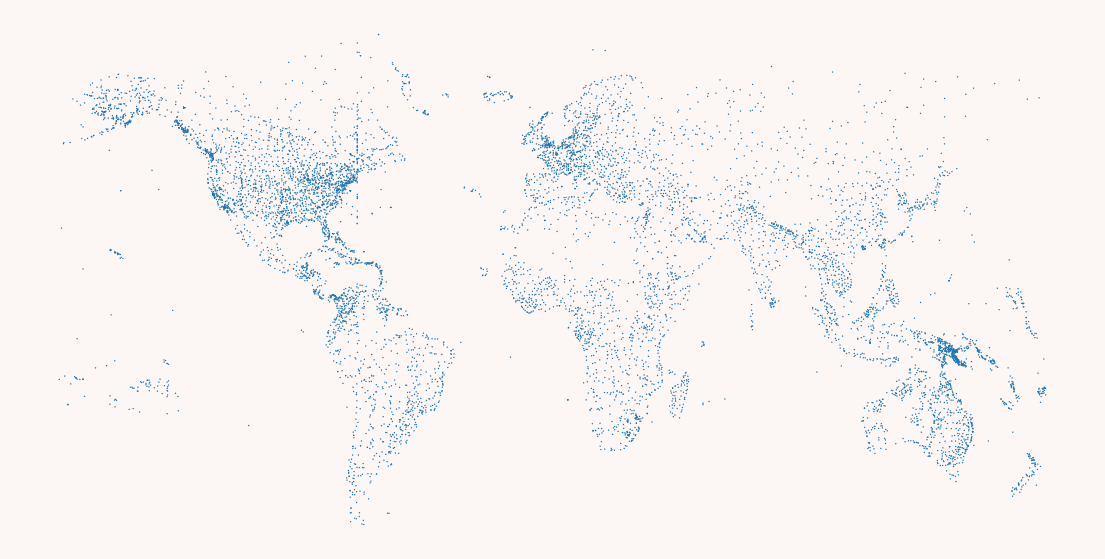

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)

ax.scatter(Airports['Lon'], Airports['Lat '], s=1, alpha=1, edgecolors='none')
ax.axis('off')

plt.show()

MISSING AIRPORTS


After study, some airports were missing for further study, so they were added directly to the flight history dataset. 
Here are the airports concerned :


TIS,Thursday Island,Australia,-10.5866,142.2874
ALM,Alamogordo-White Sands,USA,32.84,-105.9905
TSM,Taos,USA,36.4591,-105.6752
BLF,Mercer,USA,37.2958,-81.2077
BFD,Bradford,USA,41.8030,-78.64
MOD,Modesto,USA,37.6258,-120.9544
PNF,Peterson's Point,USA,58.6833,-156.8333
FHU,Sierra Vista,USA,31.5870,-110.3447
DRB,Derby,17.3699,-123.6626
HII,Lake Havasu,USA,34.5671,-114.3590
JGC,Grand Canyon,USA,35.9670,-112.1330
LWT,Lewistown Muni,USA,47.0484,-109.4717
MLS,Miles City,USA,46.4277,-105.8753
ILE,Skylark,USA,31.0879,-97.6841
HYL,Clark Bay,USA,55.4808,-132.6516
BQH,London Biggin Hill Airport,United Kingdom,51.33079910279999,0.0324999988079

In [19]:
def Source_To_Destination(DataFlight):
    Source_destination = DataFlight[['Source','Target']].values
    return np.array(Source_destination)

UK_Source_Destination = Source_To_Destination(UK_Flights)
USA_Source_Destination = Source_To_Destination(USA_Flights)
Australia_Source_Destination = Source_To_Destination(Australia_Flights)
China_Source_Destination = Source_To_Destination(China_Flights)


In [86]:
UK_Source_Destination

array([['EMA', 'IOM'],
       ['IOM', 'EMA'],
       ['EDI', 'IOM'],
       ...,
       ['JER', 'EMA'],
       ['MAN', 'BFS'],
       ['BFS', 'LTN']], dtype=object)

For the rest of the study, we will use two complementary python libraries for graph analysis: NetworkX and Cartopy.

NetworkX is a Python module for manipulating and analyzing graphs and networks. It provides a variety of tools for creating graphs, browsing graphs, calculating graph statistics, and more. NetworkX can be used in many contexts, including data analysis, complex systems modeling, and data visualization.

Cartopy is a Python module for creating maps and visualizing them. It provides a variety of tools for creating map projections, drawing lines and polygons, and adding markers and labels to maps. Cartopy can be used to visualize geographic data and to create scientific and data visualization maps.



In [88]:
UK_g =nx.from_edgelist(UK_Source_Destination)
UK_g = nx.DiGraph(edgelist =UK_Source_Destination)
USA_g =nx.from_edgelist(USA_Source_Destination)
Australia_g =nx.from_edgelist(Australia_Source_Destination)
China_g =nx.from_edgelist(China_Source_Destination)

In [22]:
Airports_lat_lon = Airports [['id','Lat ','Lon']]
Airports_lat_lon

id       Lat          Lon
0     BIN  34.800000   67.816667
1     BST  31.582998   64.360000
2     CCN  34.516701   65.250001
3     DAZ  38.466667   70.883333
4     FAH  32.391730   62.096819
...   ...        ...         ...
9044  LWT  47.048400 -109.471700
9045  MLS  46.427700 -105.875300
9046  ILE  31.087900  -97.684100
9047  HYL  55.480800 -132.651600
9048  BQH  51.330799    0.032500

[9049 rows x 3 columns]

In [23]:
pos = {v['id']: (v['Lon'], v['Lat '])
           for airport, v in
            Airports_lat_lon.to_dict('index').items()}
pos['EMA']


(-1.328056, 52.831111)

In [89]:
UK_sg =next(UK_g.subgraph(c) for c in nx.connected_components(UK_g))
USA_sg =next(USA_g.subgraph(c) for c in nx.connected_components(USA_g))
Australia_sg =next(Australia_g.subgraph(c) for c in nx.connected_components(Australia_g))
China_sg =next(China_g.subgraph(c) for c in nx.connected_components(China_g))

NetworkXNotImplemented: not implemented for directed type

In [25]:
UK_deg = nx.degree(UK_sg)
UK_sizes = [10 * UK_deg[iata] for iata in UK_sg.nodes]

USA_deg = nx.degree(USA_sg)
USA_sizes = [8 * USA_deg[iata] for iata in USA_sg.nodes]

Australia_deg = nx.degree(Australia_sg)
Australia_sizes = [16 * Australia_deg[iata] for iata in Australia_sg.nodes]

China_deg = nx.degree(China_sg)
China_sizes = [11 * China_deg[iata] for iata in China_sg.nodes]


In [26]:
USA_labels = {iata: iata if USA_deg[iata] >= 40 else ''
          for iata in USA_sg.nodes}

In [27]:
sorted(dict(UK_deg).items(), key=lambda x: x[1],reverse = True)

[('GLA', 25),
 ('EDI', 21),
 ('JER', 20),
 ('ABZ', 17),
 ('MAN', 16),
 ('IOM', 15),
 ('BHD', 15),
 ('LGW', 13),
 ('BFS', 13),
 ('NCL', 11),
 ('STN', 11),
 ('KOI', 10),
 ('BHX', 10),
 ('GCI', 10),
 ('SOU', 9),
 ('BRS', 9),
 ('CWL', 8),
 ('LHR', 8),
 ('LBA', 8),
 ('EMA', 7),
 ('LCY', 7),
 ('INV', 7),
 ('LTN', 7),
 ('PLH', 4),
 ('LSI', 4),
 ('PPW', 4),
 ('NRL', 4),
 ('SOY', 4),
 ('EXT', 4),
 ('PIK', 4),
 ('BLK', 3),
 ('WIC', 3),
 ('SYY', 3),
 ('WRY', 3),
 ('LDY', 3),
 ('NDY', 3),
 ('NQY', 3),
 ('MME', 3),
 ('NWI', 3),
 ('ACI', 3),
 ('LPL', 2),
 ('SWS', 2),
 ('BEB', 2),
 ('EOI', 2),
 ('BRR', 2),
 ('FIE', 2),
 ('ILY', 1),
 ('TRE', 1),
 ('CAL', 1),
 ('LWK', 1),
 ('DND', 1),
 ('BOH', 1),
 ('HUY', 1)]

In [28]:
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image


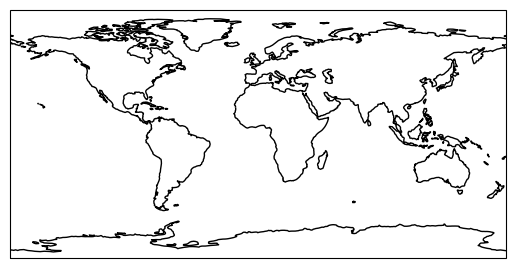

In [29]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

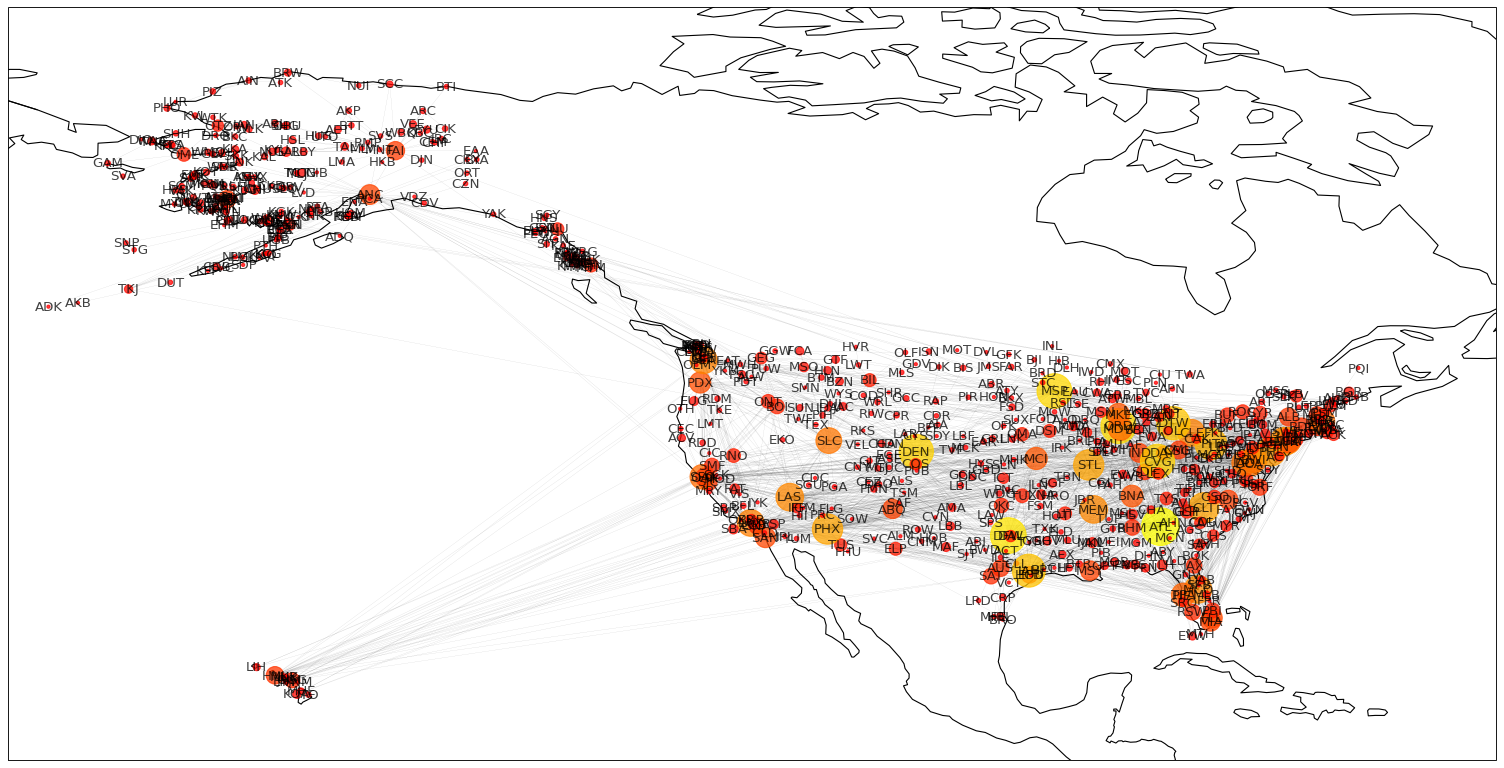

In [30]:
USA_deg = nx.degree(USA_sg)
USA_sizes = [8 * USA_deg[iata] for iata in USA_sg.nodes]
from matplotlib.pyplot import figure
figure(figsize=(24, 18), dpi=80)

crs = ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.coastlines()

    # Extent of continental US.


nx.draw_networkx(USA_sg, ax=ax,
                     font_size=12,
                     alpha=.75,
                     width=.05,
                     node_size=USA_sizes,
                     #labels=USA_labels,
                     pos=pos,
                     node_color=USA_sizes,
                     cmap=plt.cm.autumn) 
                    
plt.show()

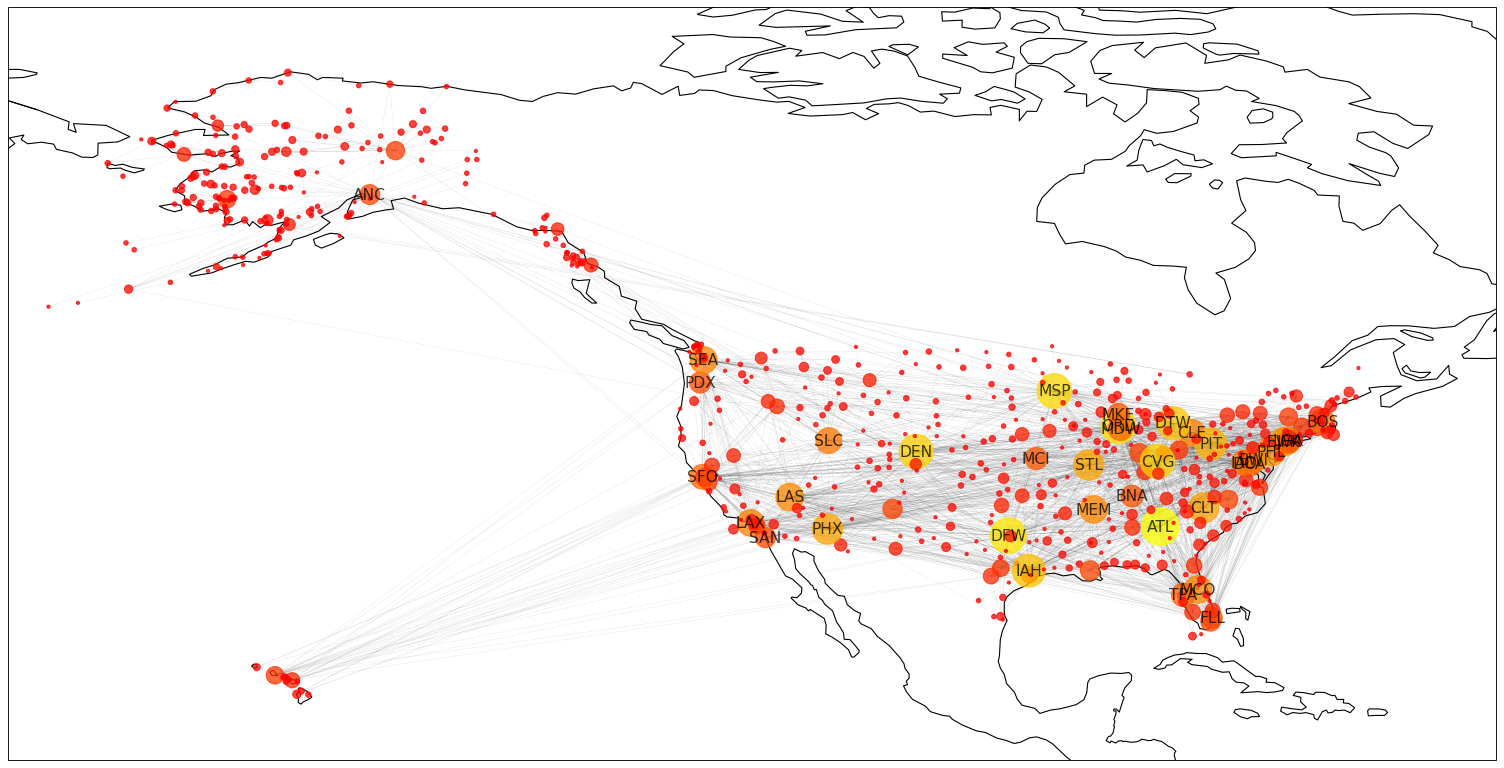

In [31]:
from matplotlib.pyplot import figure
figure(figsize=(24, 18), dpi=80)

crs = ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.coastlines()

    # Extent of continental US.


nx.draw_networkx(USA_sg, ax=ax,
                     font_size=14,
                     alpha=.75,
                     width=.05,
                     node_size=USA_sizes,
                     labels=USA_labels,
                     pos=pos,
                     node_color=USA_sizes,
                     cmap=plt.cm.autumn) 
                    
plt.show()

DiDegreeView({})

NetworkXError: Node 'EMA' has no position.

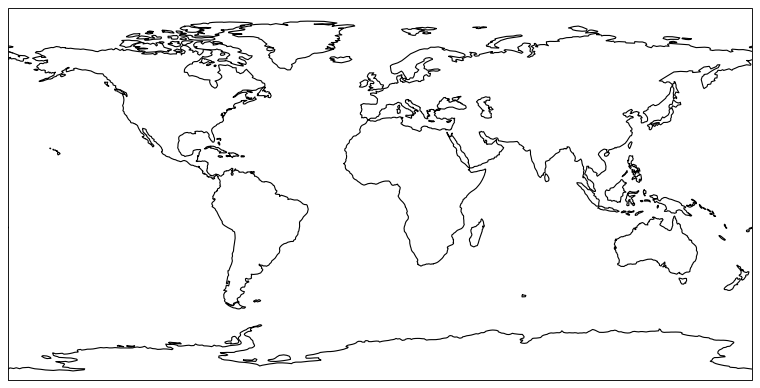

In [94]:
from matplotlib.pyplot import figure
figure(figsize=(12, 18), dpi=80)

crs = ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.coastlines()

    # Extent of continental US.


nx.draw_networkx(UK_sg, ax=ax,
                     font_size=18,
                     alpha=.75,
                     width=.05,
                     node_size=UK_sizes,
                     #labels=Australia_sizes,
                     pos=pos,
                     node_color=UK_sizes,
                     cmap=plt.cm.autumn) 
                    
plt.show()

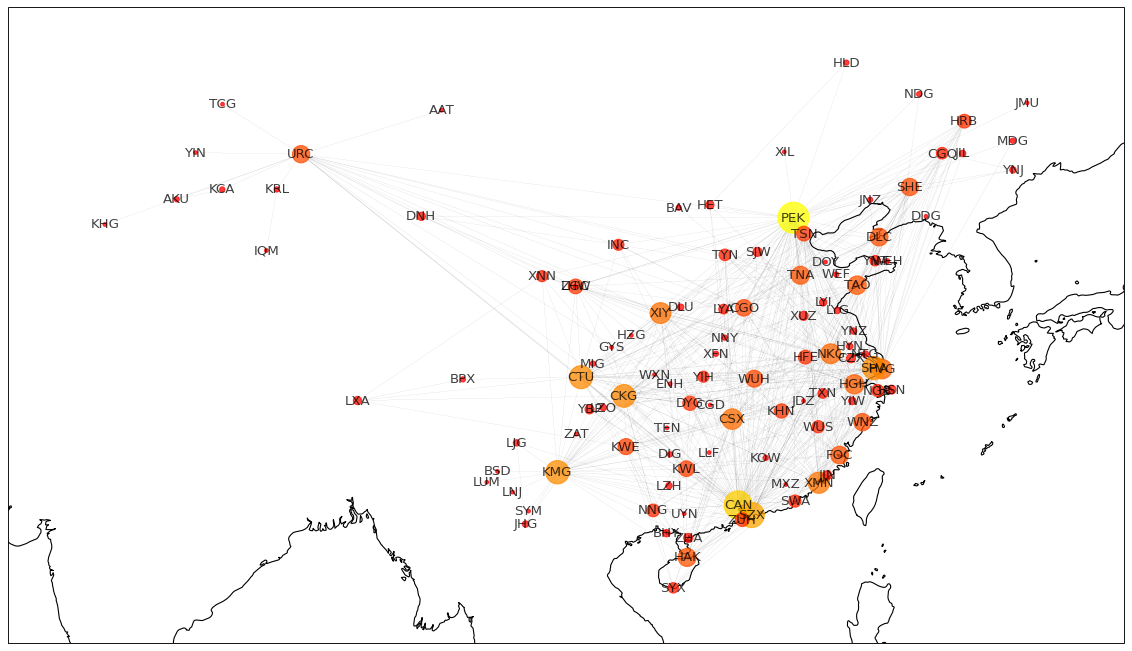

In [33]:
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=80)

crs = ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.coastlines()

    # Extent of continental US.


nx.draw_networkx(China_sg, ax=ax,
                     font_size=12,
                     alpha=.75,
                     width=.05,
                     node_size=China_sizes,
                     #labels=Australia_sizes,
                     pos=pos,
                     node_color=China_sizes,
                     cmap=plt.cm.autumn) 
                    
plt.show()

posx and posy should be finite values
posx and posy should be finite values


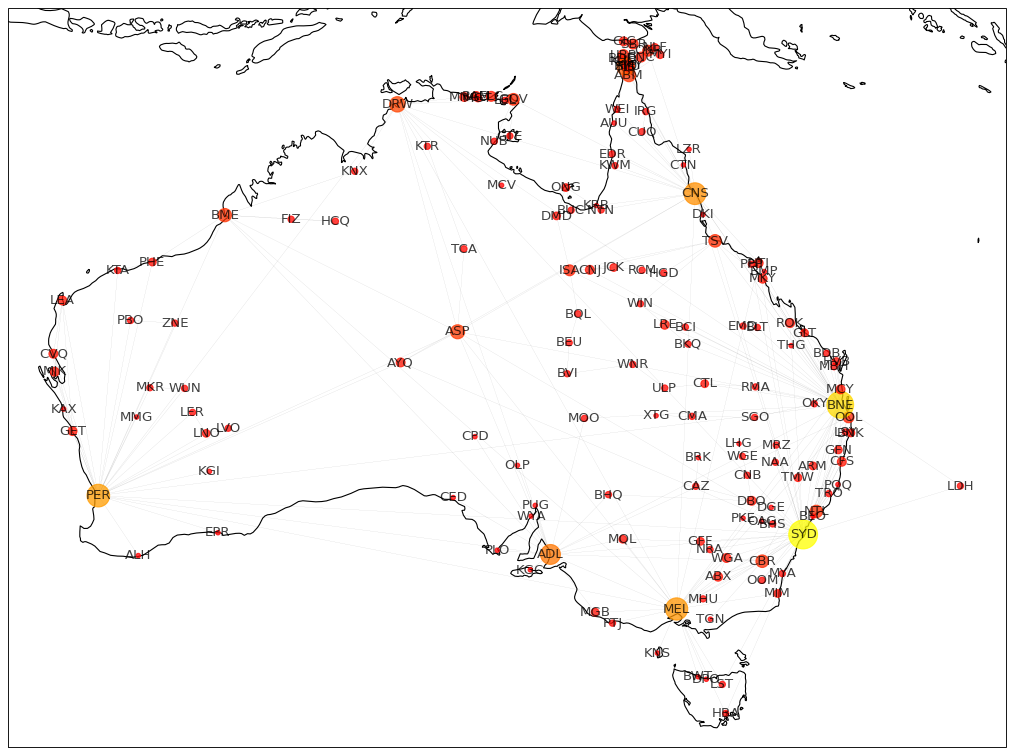

In [34]:
from matplotlib.pyplot import figure
figure(figsize=(18,12), dpi=80)

crs = ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.coastlines()


nx.draw_networkx(Australia_sg, ax=ax,
                     font_size=12,
                     alpha=.75,
                     width=.05,
                     node_size=Australia_sizes,
                     #labels=Australia_sizes,
                     pos=pos,
                     node_color=Australia_sizes,
                     cmap=plt.cm.autumn) 
                    
plt.show()


In [35]:
nx.draw_networkx(Australia_sg, ax=ax,
                     font_size=6,
                     alpha=.75,
                     width=.05,
                     node_size=Australia_sizes,
                     #labels=labels,
                     pos=pos,
                     node_color=Australia_sizes,
                     cmap=plt.cm.autumn)  

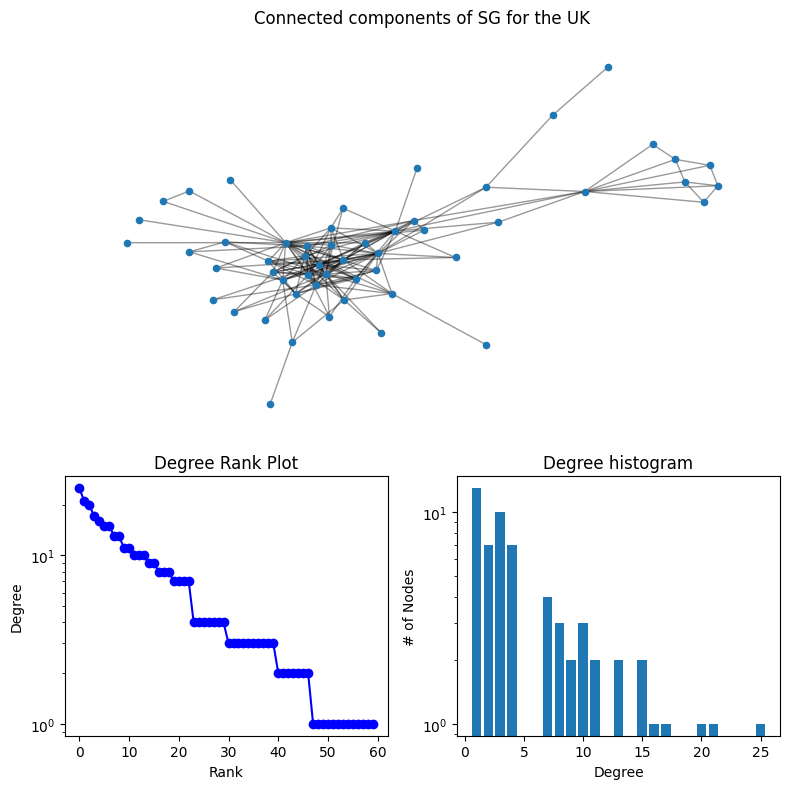

In [36]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


degree_sequence = sorted((d for n, d in UK_g.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = UK_sg.subgraph(sorted(nx.connected_components(UK_sg), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of SG for the UK")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax1.set_yscale("log")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_yscale("log")

fig.tight_layout()
plt.show()

In [37]:
r = nx.degree_assortativity_coefficient(UK_sg)
print(f"Assortativity coefficient: {r}")

Assortativity coefficient: -0.1791171076312097


In [38]:
r = nx.degree_assortativity_coefficient(USA_sg)
print(f"Assortativity coefficient: {r}")

Assortativity coefficient: -0.2023227341217647


In [39]:
r = nx.degree_assortativity_coefficient(China_sg)
print(f"Assortativity coefficient: {r}")

Assortativity coefficient: -0.39717280505156854


In [40]:
r = nx.degree_assortativity_coefficient(Australia_sg)
print(f"Assortativity coefficient: {r}")

Assortativity coefficient: -0.23038801282202542


Dans le contexte de l'analyse de graphes appliquée au traffic aérien, l'assortativité (ou "corrélation de degré") mesure la tendance des nœuds du graphe à être liés à d'autres nœuds ayant des degrés similaires. Elle peut être positive, négative ou nulle.

Une assortativité positive signifie que les nœuds avec des degrés élevés ont tendance à être liés entre eux, tandis qu'une assortativité négative signifie que les nœuds avec des degrés élevés ont tendance à être liés à des nœuds avec des degrés faibles. Une assortativité nulle indique que la distribution de degré des nœuds n'a aucune influence sur leur degré de liaison.

En analysant l'assortativité d'un graphe, on peut en déduire des informations sur la structure du graphe et sur les relations entre les nœuds. Par exemple, dans le cas du traffic aérien, une assortativité positive pourrait signifier que les aéroports avec un grand nombre de vols ont tendance à être liés entre eux, tandis qu'une assortativité négative pourrait indiquer que les aéroports avec un grand nombre de vols ont tendance à être liés à des aéroports avec un nombre moins élevé de vols.

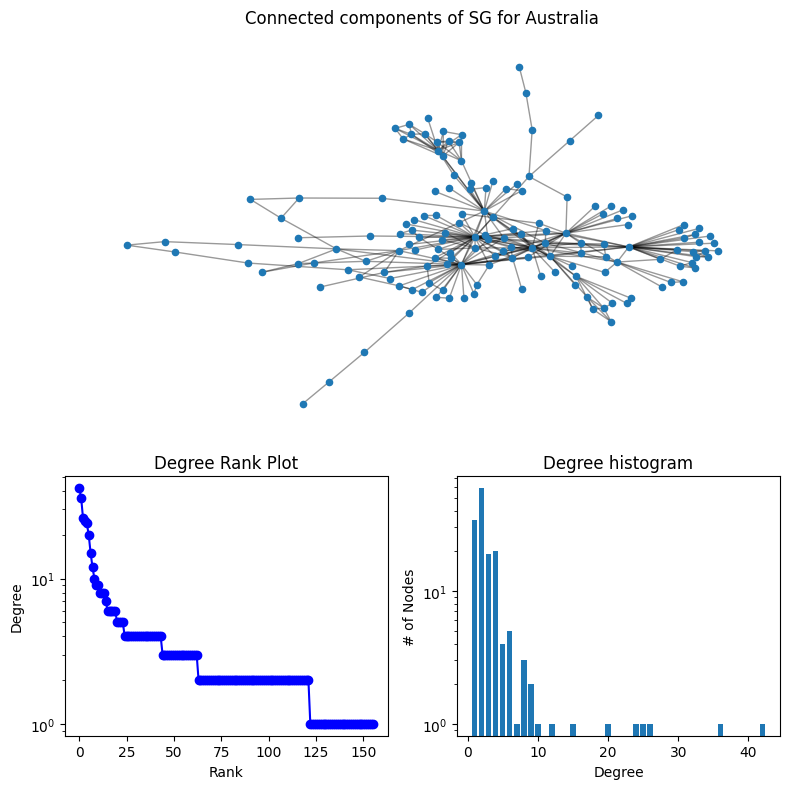

In [41]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


degree_sequence = sorted((d for n, d in Australia_sg.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = Australia_sg.subgraph(sorted(nx.connected_components(Australia_sg), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of SG for Australia")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax1.set_yscale("log")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_yscale("log")

fig.tight_layout()
plt.show()

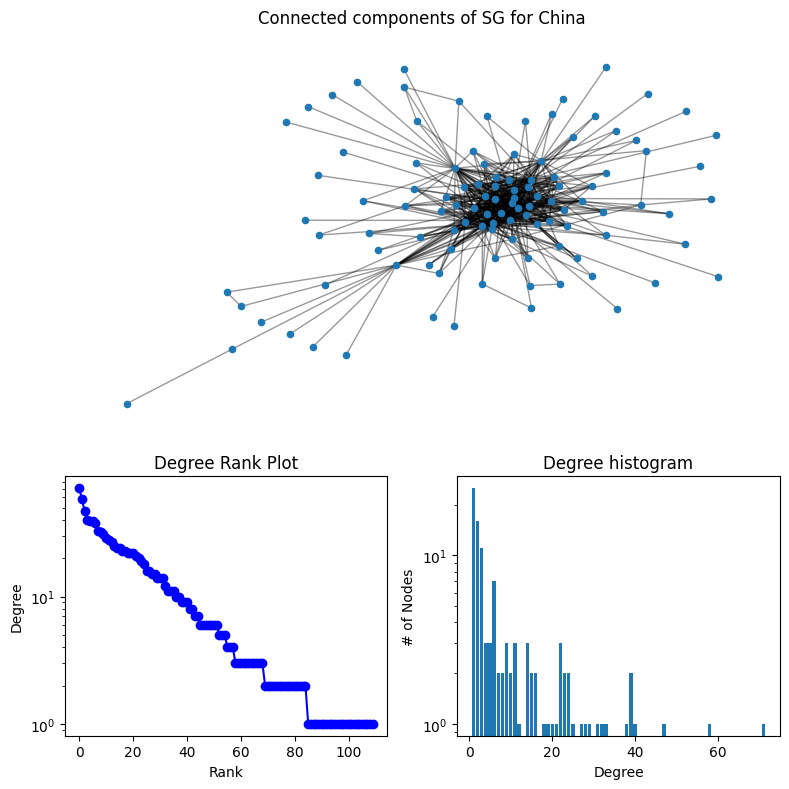

[71, 58, 47, 40, 39, 39, 38, 33, 32, 31, 29, 28, 27, 25, 24, 24, 23, 23, 22, 22, 22, 21, 20, 19, 18, 16, 16, 15, 15, 14, 14, 14, 12, 11, 11, 11, 10, 10, 9, 9, 9, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [71]:

degree_sequence = sorted((d for n, d in China_sg.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = China_sg.subgraph(sorted(nx.connected_components(China_sg), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of SG for China")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax1.set_yscale("log")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_yscale("log")

fig.tight_layout()
plt.show()
print(degree_sequence)

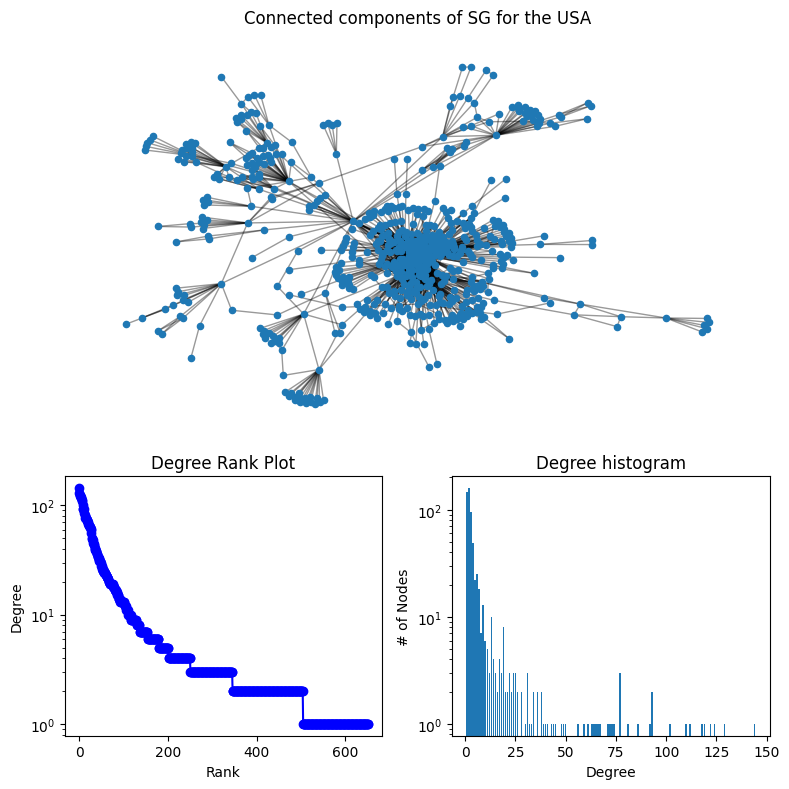

In [82]:
degree_sequence = sorted((d for n, d in USA_sg.degree()), reverse=True)
dmax = max(degree_sequence)
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = USA_sg.subgraph(sorted(nx.connected_components(USA_sg), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of SG for the USA")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax1.set_yscale("log")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_yscale("log")

fig.tight_layout()
plt.show()

le graphe a une structure hiérarchique, avec un certain nombre de nœuds ayant un degré très élevé (ces nœuds sont souvent appelés "hubs") et la plupart des autres nœuds ayant un degré relativement faible.
En analysant une courbe de distribution de degré en forme de fonction inverse, on peut en déduire que le graphe a une structure hiérarchique et que certains nœuds sont beaucoup plus connectés que d'autres. Cette structure peut avoir des implications sur le fonctionnement du graphe et sur la manière dont les informations ou les ressources sont distribuées dans le réseau. Par exemple, dans le cas d'un réseau de transport, les hubs pourraient être des aéroports ou des gares importantes qui sont reliées à de nombreuses destinations, tandis que les autres nœuds pourraient être des aéroports ou des gares moins importants.

Il est important de noter que la forme de la courbe de distribution de degré peut varier selon le graphe considéré et peut être influencée par différents facteurs tels que la taille du graphe, la densité des liens entre les nœuds, etc. Il est donc important de prendre en compte ces éléments lors de l'interprétation des résultats.





La distribution de degré d'un graphe est la répartition des degrés des nœuds dans le graphe. Le degré d'un nœud dans un graphe est le nombre de liens qui le relient à d'autres nœuds. La distribution de degré peut être représentée sous forme de courbe, où l'axe des abscisses représente le rang des nœuds (c'est-à-dire leur position dans l'ordre croissant des degrés) et l'axe des ordonnées représente la fréquence des degrés (c'est-à-dire le nombre de nœuds ayant un degré donné).

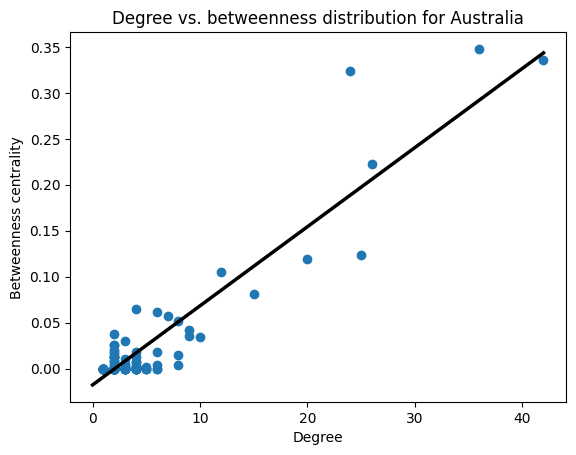

In [81]:
degree_sequence = [Australia_sg.degree(n) for n in Australia_sg.nodes()]
betweenness = nx.betweenness_centrality(Australia_sg)
plt.scatter(degree_sequence, [betweenness[n] for n in Australia_sg.nodes()])
b,a = np.polyfit(degree_sequence,[betweenness[n] for n in Australia_sg.nodes()], deg=1)
xseq = np.linspace(0, 42, num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);
plt.xlabel("Degree")
plt.ylabel("Betweenness centrality")
plt.title('Degree vs. betweenness distribution for Australia')
plt.show()

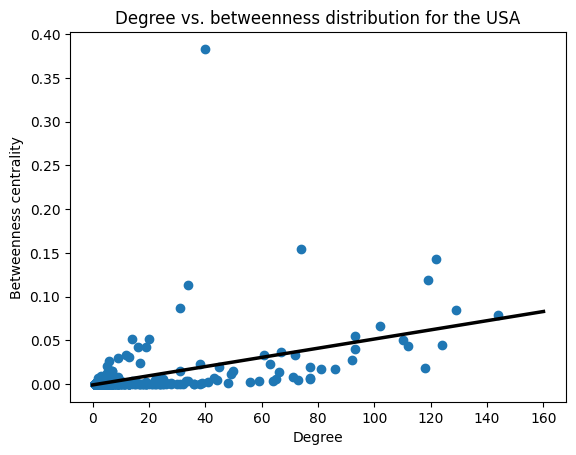

In [76]:
degree_sequence = [USA_sg.degree(n) for n in USA_sg.nodes()]
betweenness = nx.betweenness_centrality(USA_sg)

b,a = np.polyfit(degree_sequence,[betweenness[n] for n in USA_sg.nodes()], deg=1)
xseq = np.linspace(0, 160, num=100)

plt.scatter(degree_sequence, [betweenness[n] for n in USA_sg.nodes()])
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);
plt.xlabel("Degree")
plt.ylabel("Betweenness centrality")
plt.title('Degree vs. betweenness distribution for the USA')
plt.show()

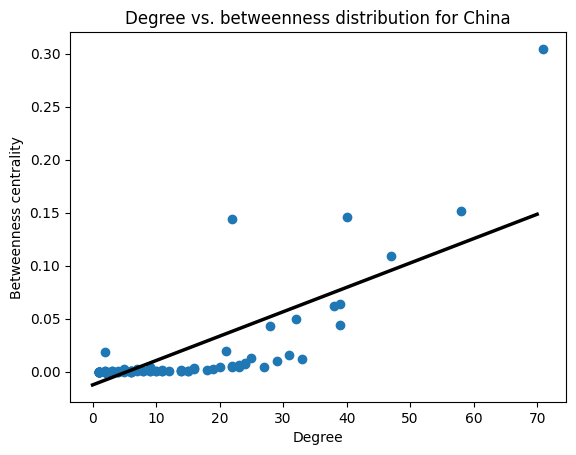

In [79]:
degree_sequence = [China_sg.degree(n) for n in China_sg.nodes()]
betweenness = nx.betweenness_centrality(China_sg)
b,a = np.polyfit(degree_sequence,[betweenness[n] for n in China_sg.nodes()], deg=1)
xseq = np.linspace(0, 70, num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);

plt.scatter(degree_sequence, [betweenness[n] for n in China_sg.nodes()])
plt.xlabel("Degree")
plt.ylabel("Betweenness centrality")
plt.title('Degree vs. betweenness distribution for China')
plt.show()

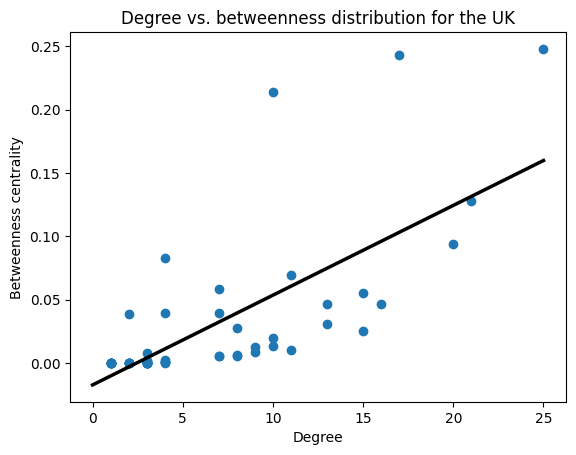

In [80]:
degree_sequence = [UK_sg.degree(n) for n in UK_sg.nodes()]
betweenness = nx.betweenness_centrality(UK_sg)
b,a = np.polyfit(degree_sequence,[betweenness[n] for n in UK_sg.nodes()], deg=1)
xseq = np.linspace(0, 25, num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);
plt.scatter(degree_sequence, [betweenness[n] for n in UK_sg.nodes()])
plt.xlabel("Degree")
plt.ylabel("Betweenness centrality")
plt.title('Degree vs. betweenness distribution for the UK')
plt.show()

Le degré d'un nœud dans un graphe est le nombre de liens qui le relient à d'autres nœuds. La centralité intermédiaire d'un nœud mesure l'importance de ce nœud dans les chemins entre les autres nœuds du graphe. Plus un nœud est central en termes de centralité intermédiaire, plus il est impliqué dans de nombreux chemins entre les autres nœuds.

En représentant la distribution de degré vs. de centralité intermédiaire sur un graphique, on peut visualiser comment ces deux mesures sont liées dans le graphe et comment elles peuvent être utilisées pour comprendre la structure du graphe et les relations entre les nœuds.

Par exemple, si la distribution de degré et de centralité intermédiaire présente une forte corrélation (c'est-à-dire que les nœuds avec un degré élevé ont également une centralité intermédiaire élevée), cela peut indiquer que les nœuds avec un degré élevé sont également très impliqués dans de nombreux chemins entre les autres nœuds du graphe. Dans le cas du traffic aérien, cela pourrait signifier que certains aéroports sont très connectés et jouent un rôle important dans la circulation des vols entre les autres aéroports.

In [48]:
def plot_degree_degree_assortativity(network):
    degrees = dict(nx.degree(network))
    x = []
    y = []

    for (u, v) in network.edges():
        x.append(degrees[u])
        y.append(degrees[v])

# Plot the degree-degree assortativity
    plt.scatter(x,y)



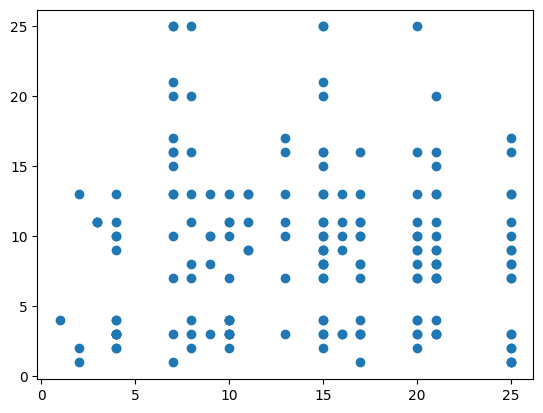

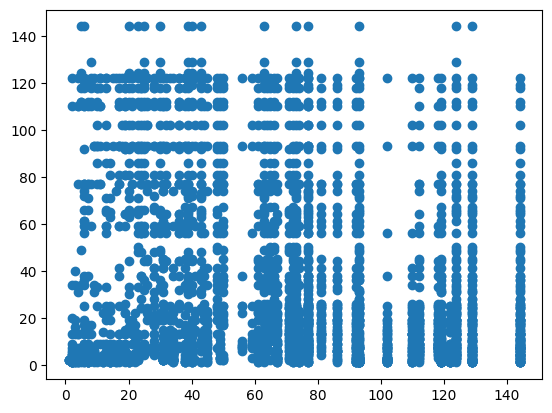

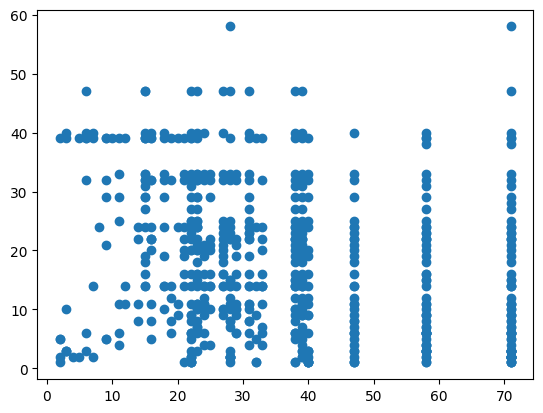

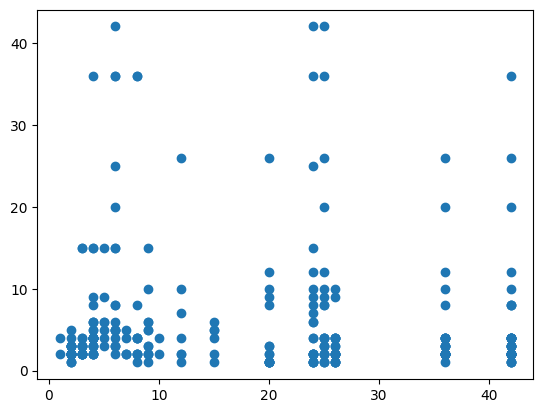

In [50]:
plot_degree_degree_assortativity(UK_sg)
plt.show()
plot_degree_degree_assortativity(USA_sg)
plt.show()

plot_degree_degree_assortativity(China_g)
plt.show()

plot_degree_degree_assortativity(Australia_g)
plt.show()


Text(0.5, 1.0, 'Assortativity  (degree-degree  correlation) for the UK')

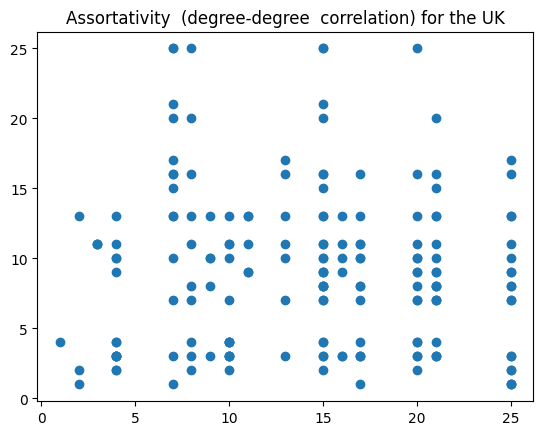

In [51]:
degrees = dict(nx.degree(UK_sg))
x = []
y = []

for (u, v) in UK_sg.edges():
    x.append(degrees[u])
    y.append(degrees[v])

# Plot the degree-degree assortativity
plt.scatter(x,y)
plt.title('Assortativity  (degree-degree  correlation) for the UK')




Text(0.5, 1.0, 'Assortativity  (degree-degree  correlation) for the USA')

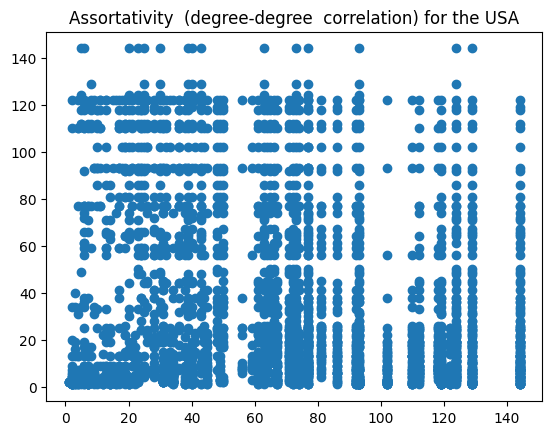

In [ ]:
degrees = dict(nx.degree(USA_sg))
x = []
y = []

for (u, v) in USA_sg.edges():
    x.append(degrees[u])
    y.append(degrees[v])

# Plot the degree-degree assortativity
plt.scatter(x,y)
plt.title('Assortativity  (degree-degree  correlation) for the USA')



Text(0.5, 1.0, 'Assortativity  (degree-degree  correlation) for China')

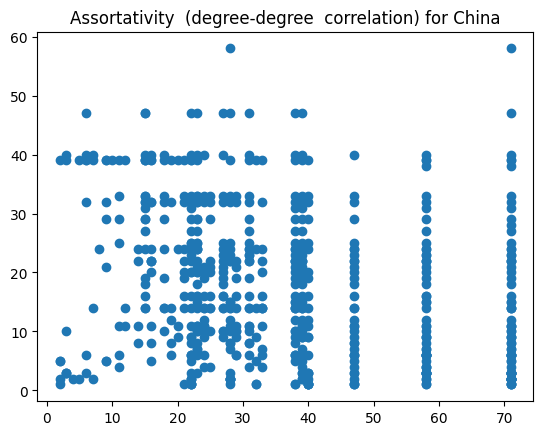

In [ ]:
degrees = dict(nx.degree(China_sg))
x = []
y = []

for (u, v) in China_sg.edges():
    x.append(degrees[u])
    y.append(degrees[v])

# Plot the degree-degree assortativity
plt.scatter(x,y)
plt.title('Assortativity  (degree-degree  correlation) for China')


Text(0.5, 1.0, 'Assortativity  (degree-degree  correlation) for Australia')

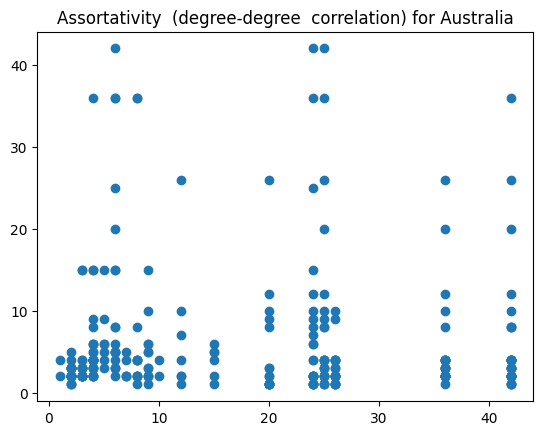

In [ ]:
degrees = dict(nx.degree(Australia_sg))
x = []
y = []

for (u, v) in Australia_sg.edges():
    x.append(degrees[u])
    y.append(degrees[v])

# Plot the degree-degree assortativity
plt.scatter(x,y)
plt.title('Assortativity  (degree-degree  correlation) for Australia')



In [69]:
corr = nx.degree_pearson_correlation_coefficient(UK_sg)
degrees = nx.degree(UK_sg)



In [60]:
dict(degrees).values()

dict_values([7, 15, 21, 2, 15, 3, 8, 20, 4, 2, 7, 25, 1, 13, 17, 2, 4, 10, 7, 8, 16, 10, 1, 3, 11, 9, 9, 4, 1, 3, 2, 7, 2, 4, 4, 3, 2, 3, 3, 3, 1, 8, 3, 3, 4, 10, 1, 1, 4, 11, 3, 1, 13])

In [191]:
UK_core_community_sizes = nx.core_number(UK_sg)
USA_core_community_sizes = nx.core_number(USA_sg)
China_core_community_sizes = nx.core_number(China_sg)
Australia_core_community_sizes = nx.core_number(Australia_sg)


In [192]:
max_core_number = max(Australia_core_community_sizes.values())
Australia_core_community_sizes = sum([1 for v in Australia_core_community_sizes.values() if v == max_core_number])
Australia_core_community_sizes

7

In [193]:
max_core_number = max(USA_core_community_sizes.values())
USA_core_community_sizes = sum([1 for v in USA_core_community_sizes.values() if v == max_core_number])
USA_core_community_sizes

38

In [187]:
max_core_number = max(China_core_community_sizes.values())
China_core_community_sizes = sum([1 for v in China_core_community_sizes.values() if v == max_core_number])
China_core_community_sizes

25

In [194]:
max_core_number = max(UK_core_community_sizes.values())
UK_core_community_sizes = sum([1 for v in UK_core_community_sizes.values() if v == max_core_number])
UK_core_community_sizes

18

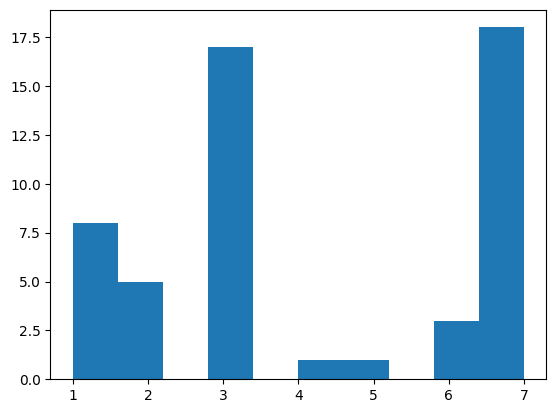

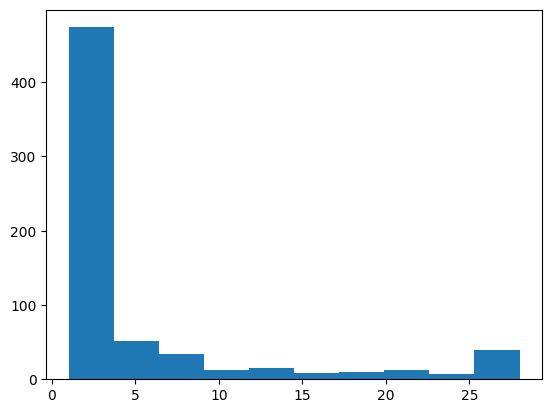

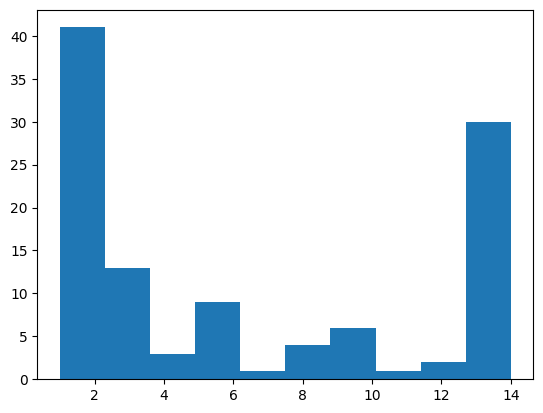

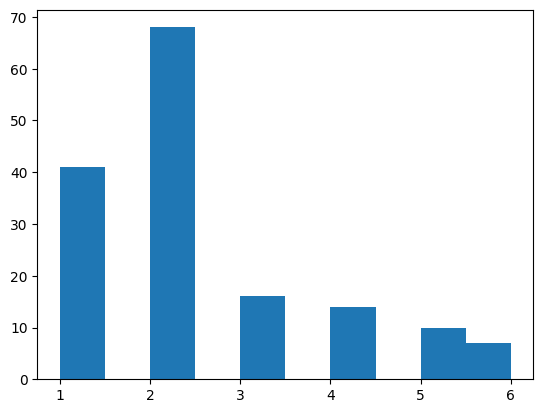

In [ ]:
plt.hist(list(UK_core_community_sizes.values()))
plt.show()
plt.hist(list(USA_core_community_sizes.values()))
plt.show()
plt.hist(list(China_core_community_sizes.values()))
plt.show()
plt.hist(list(Australia_core_community_sizes.values()))
plt.show()

In [ ]:
len(USA_sg)

652

In [ ]:
len(USA_g
)

663

In [ ]:
shortest_paths = nx.shortest_path_length(USA_g)

In [ ]:
print(shortest_paths)

<generator object all_pairs_shortest_path_length at 0x118eef640>


In [138]:
import networkx as nx
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform

# Chargement du graphe à partir d'un fichier de données

# Calcul de la matrice de distance pour chaque noeud du graphe
UK_distance_matrix1 = nx.floyd_warshall_numpy(UK_sg)
USA_distance_matrix1 = nx.floyd_warshall_numpy(USA_sg)
China_distance_matrix1 = nx.floyd_warshall_numpy(China_sg)
Australia_distance_matrix1 = nx.floyd_warshall_numpy(Australia_sg)

UK_distance_matrix2 = squareform(UK_distance_matrix1)
USA_distance_matrix2 = squareform(USA_distance_matrix1)
China_distance_matrix2 = squareform(China_distance_matrix1)
Australia_distance_matrix2 = squareform(Australia_distance_matrix1)



# Calcul de l'agglomeration hiérarchique à partir de la matrice de distance
UK_Z = shc.linkage(UK_distance_matrix2, method='ward')
USA_Z = shc.linkage(USA_distance_matrix2, method='ward')
China_Z = shc.linkage(China_distance_matrix2, method='ward')
Australia_Z = shc.linkage(Australia_distance_matrix2, method='ward')

UK_clusters = shc.fcluster(UK_Z,t=5, criterion='maxclust'  )
USA_clusters = shc.fcluster(USA_Z,t=8, criterion='maxclust' )
China_clusters = shc.fcluster(China_Z,t=4 ,criterion='maxclust')
Australia_clusters = shc.fcluster(Australia_Z,t=4 ,criterion='maxclust')


# Affichage des résultats


In [ ]:
pos = {v['id']: (v['Lon'], v['Lat '])
           for airport, v in
            Airports_lat_lon.to_dict('index').items()}

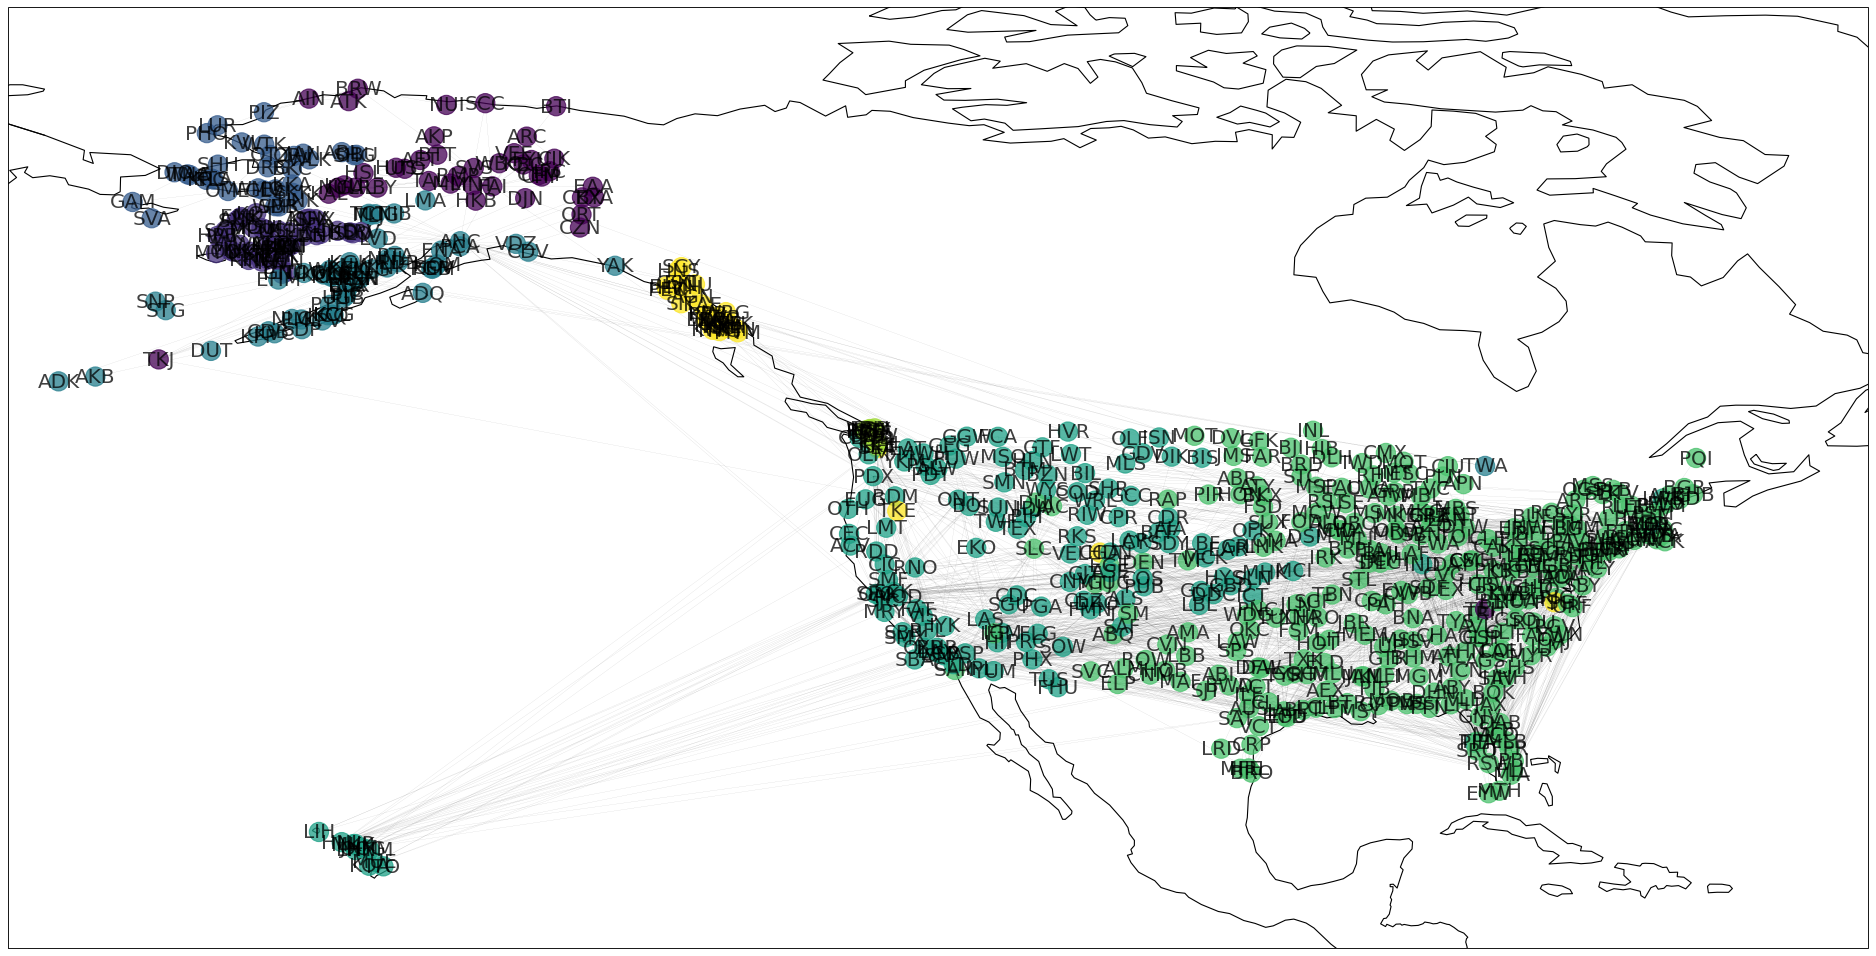

In [ ]:
colors = [int(cluster) for cluster in USA_clusters]

from matplotlib.pyplot import figure

figure(figsize=(30,24), dpi=80)
crs = ccrs.PlateCarree()
ax= plt.axes(projection=crs)
ax.coastlines()
nx.draw_networkx(USA_sg, ax=ax,
                     font_size=18,
                     alpha=.75,
                     width=.05,
                     #node_size=USA_sizes,
                     #labels=Australia_sizes,
                     pos=pos,
                     node_color=colors) 


Identifier les clusters qui ont un degré de centralité ou une centralité de proximité élevé. Ces clusters seront considérés comme faisant partie de la communauté centrale.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs = axs.flatten()
core_communities = {'USA' : [], 'United Kingdom' : [], 'China' : [], 'Australia' : []}

 

for ax, graph,country in zip(axs,graphs,countries):

    # Initialize a list to store the values of k+ for each node
    k_plus = []

    # Compute the degree of each node
    degrees = graph.degree(weight='Weight')

    # Sort the nodes based on degree
    sorted_nodes = sorted(degrees,key=lambda x: degrees[x[0]], reverse=True)

    # Iterate over the sorted list of nodes
    for node in sorted_nodes:

      # Get the list of neighbors for the current node
      neighbors = list(graph.neighbors(node[0]))

      # Count the number of neighbors with a higher degree
      k_plus.append(sum([degrees[n] > degrees[node[0]] for n in neighbors]))

    ranks = range(1, len(degrees)+1)
    argmax= np.argmax(k_plus)
    print('Core community size for ',country,' : ',ranks[argmax])

    # Store the core community for visualization 
    core_communities[country] = [s[0] for s in sorted_nodes[:argmax-1]]

    # Plot 
    ax.plot(ranks, k_plus)
    ax.axvline(x=argmax, color = 'red')

 

    ax.set_xlabel('Rank')
    ax.set_ylabel('Number of connections to higher degree nodes')
    title = 'Core periphery structure for '+ country
    ax.set_title(title)

 

# Show the plot
plt.savefig('CPS.png')
plt.show()

In [146]:
# Obtenir la liste des tailles de chaque cluster
cluster_sizes = [len([i for i, c in enumerate(UK_clusters) if c == cluster]) for cluster in set(UK_clusters)]

# Trier les clusters par taille
sorted_clusters = [cluster for _, cluster in sorted(zip(cluster_sizes, set(UK_clusters)), key=lambda pair: pair[0], reverse=True)]

sorted_clusters

[1, 3, 5, 2, 4]

Core community size for the USA :  42


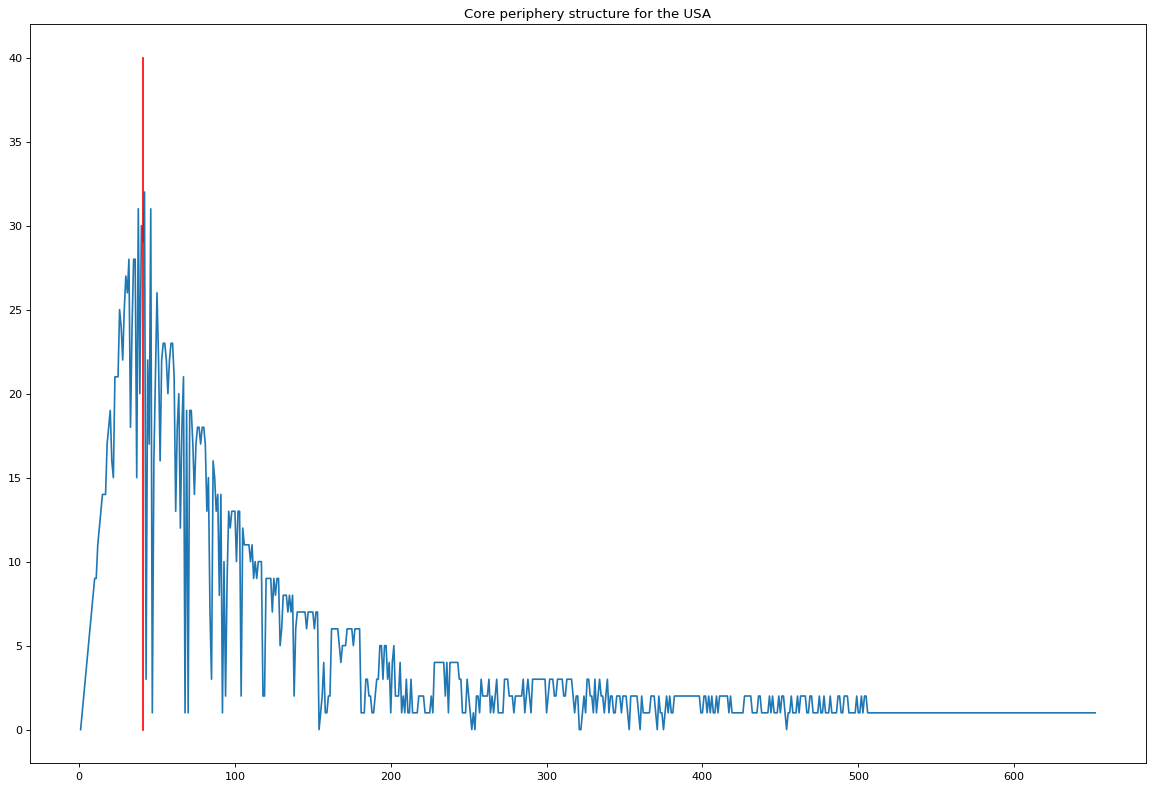

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 9,
 11,
 12,
 13,
 14,
 14,
 14,
 17,
 18,
 19,
 16,
 15,
 21,
 21,
 21,
 25,
 24,
 22,
 25,
 27,
 26,
 28,
 18,
 24,
 28,
 28,
 15,
 31,
 20,
 30,
 29,
 32,
 3,
 22,
 17,
 31,
 1,
 16,
 21,
 26,
 22,
 16,
 22,
 23,
 23,
 22,
 20,
 22,
 23,
 23,
 21,
 13,
 18,
 20,
 12,
 18,
 21,
 1,
 19,
 1,
 19,
 19,
 17,
 14,
 17,
 18,
 18,
 17,
 18,
 18,
 17,
 13,
 15,
 7,
 3,
 16,
 15,
 13,
 14,
 8,
 14,
 1,
 10,
 2,
 9,
 13,
 12,
 13,
 13,
 13,
 10,
 13,
 13,
 2,
 12,
 11,
 11,
 11,
 11,
 10,
 11,
 9,
 10,
 9,
 10,
 10,
 10,
 2,
 2,
 9,
 9,
 9,
 9,
 7,
 9,
 8,
 9,
 9,
 5,
 6,
 8,
 8,
 8,
 7,
 8,
 7,
 8,
 2,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 0,
 1,
 2,
 4,
 1,
 1,
 2,
 2,
 6,
 6,
 6,
 6,
 6,
 5,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 3,
 3,
 2,
 2,
 1,
 1,
 2,
 3,
 3,
 5,
 5,
 3,
 5,
 5,
 3,
 4,
 1,
 4,
 5,
 2,
 2,
 2,
 4,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,

In [172]:

 
figure(figsize=(18 ,12), dpi=80)

# Initialize a list to store the values of k+ for each node
k_plus = []

# Compute the degree of each node
degrees = USA_sg.degree()

# Sort the nodes based on degree
sorted_nodes = sorted(degrees,key=lambda x: degrees[x[0]], reverse=True)

# Iterate over the sorted list of nodes
for node in sorted_nodes:

  # Get the list of neighbors for the current node
  neighbors = list(USA_sg.neighbors(node[0]))

  # Count the number of neighbors with a higher degree
  k_plus.append(sum([degrees[n] > degrees[node[0]] for n in neighbors]))

ranks = range(1, len(degrees)+1)
argmax= np.argmax(k_plus)
print('Core community size for the USA : ',ranks[argmax])

    # Store the core community for visualization 
USA_core_community = [s[0] for s in sorted_nodes[:argmax-1]]

    # Plot 
ax.plot(ranks, k_plus)
plt.plot(ranks, k_plus)
plt.plot([argmax, argmax], [0, 40], color='red')
plt.title('Core periphery structure for the USA')
 

ax.set_xlabel('Rank')
ax.set_ylabel('Number of connections to higher degree nodes')
title = 'Core periphery structure for the USA'
ax.set_title(title)

 

# Show the plot
plt.savefig('CPS.png')
plt.show()
k_plus

Core community size for China without smoothing :  23


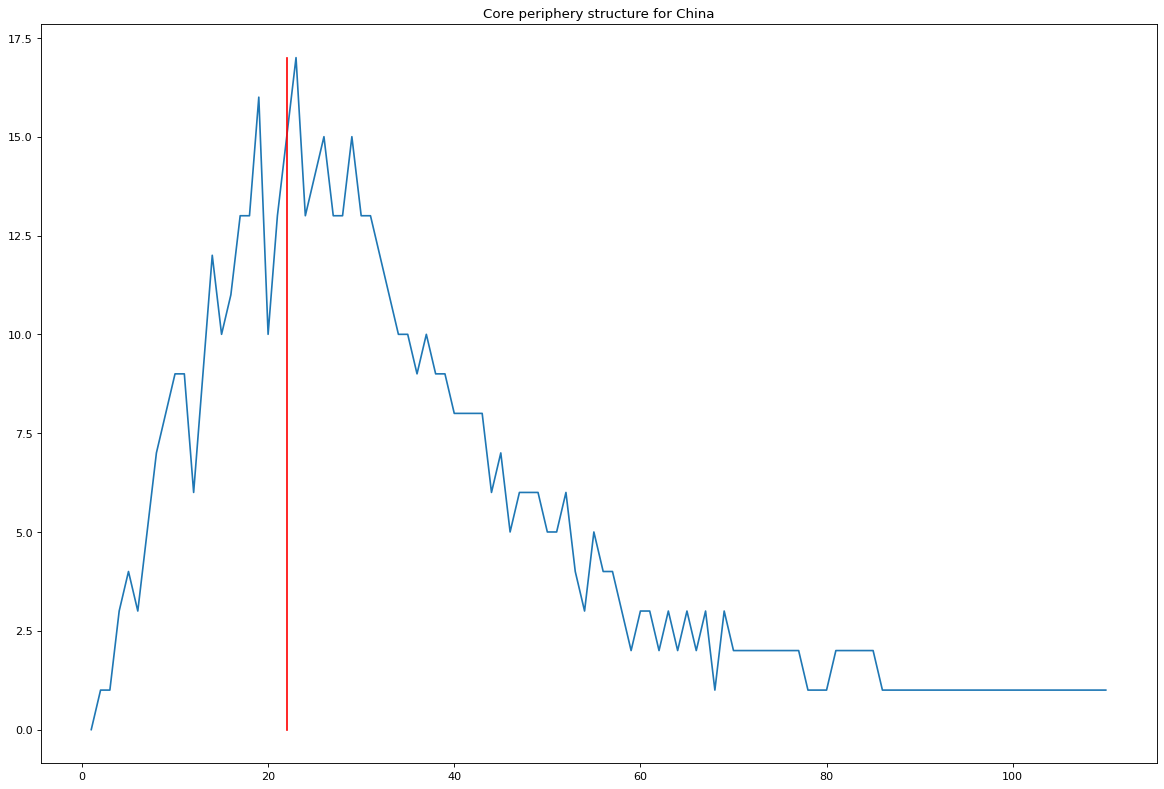

In [177]:

 
figure(figsize=(18 ,12), dpi=80)

# Initialize a list to store the values of k+ for each node
k_plus = []

# Compute the degree of each node
degrees = China_sg.degree()

# Sort the nodes based on degree
sorted_nodes = sorted(degrees,key=lambda x: degrees[x[0]], reverse=True)

# Iterate over the sorted list of nodes
for node in sorted_nodes:

  # Get the list of neighbors for the current node
  neighbors = list(China_sg.neighbors(node[0]))

  # Count the number of neighbors with a higher degree
  k_plus.append(sum([degrees[n] > degrees[node[0]] for n in neighbors]))

ranks = range(1, len(degrees)+1)
argmax= np.argmax(k_plus)
print('Core community size for China without smoothing : ',ranks[argmax])

    # Store the core community for visualization 
China_core_community = [s[0] for s in sorted_nodes[:argmax-1]]

    # Plot 
ax.plot(ranks, k_plus)
plt.plot(ranks, k_plus)
plt.plot([argmax, argmax], [0, 17], color='red')
plt.title('Core periphery structure for China')


 

ax.set_xlabel('Rank')
ax.set_ylabel('Number of connections to higher degree nodes')
title = 'Core periphery structure for China'
ax.set_title(title)

 

# Show the plot
plt.savefig('CPS.png')
plt.show()


Core community sizer for Australia without smoothing :  9


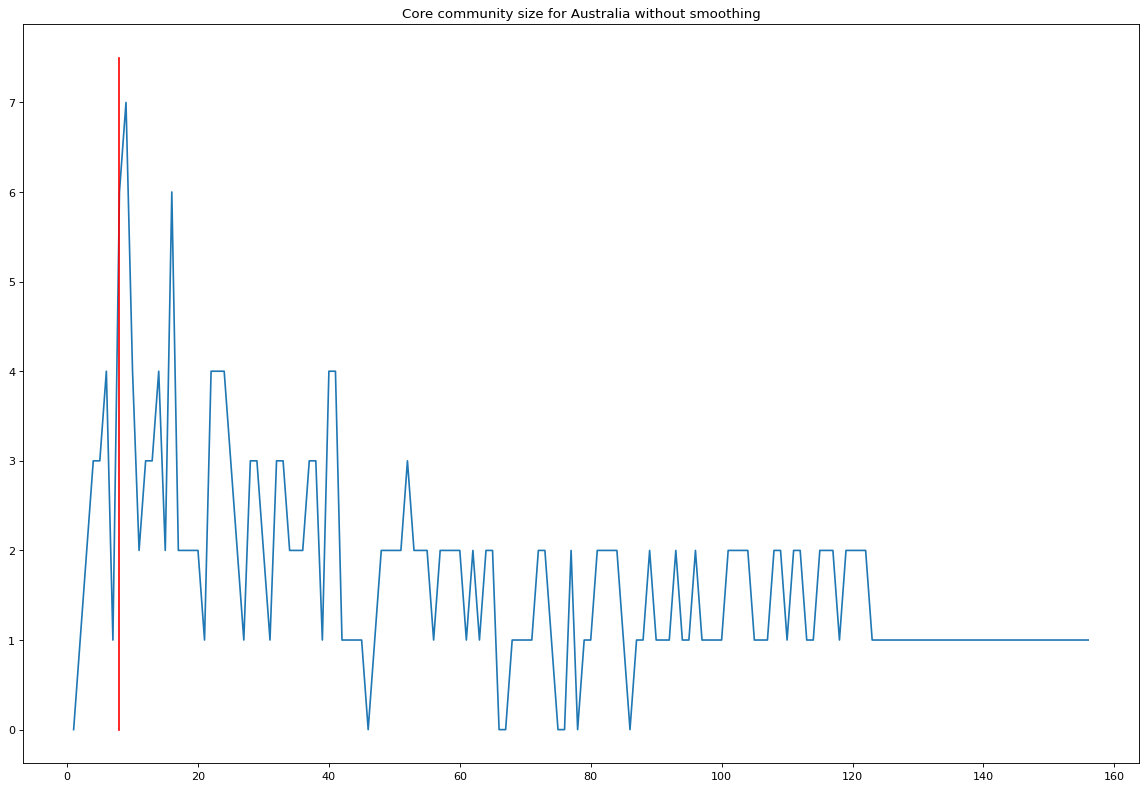

In [179]:

 
figure(figsize=(18 ,12), dpi=80)

# Initialize a list to store the values of k+ for each node
k_plus = []

# Compute the degree of each node
degrees = Australia_sg.degree()

# Sort the nodes based on degree
sorted_nodes = sorted(degrees,key=lambda x: degrees[x[0]], reverse=True)

# Iterate over the sorted list of nodes
for node in sorted_nodes:

  # Get the list of neighbors for the current node
  neighbors = list(Australia_sg.neighbors(node[0]))

  # Count the number of neighbors with a higher degree
  k_plus.append(sum([degrees[n] > degrees[node[0]] for n in neighbors]))

ranks = range(1, len(degrees)+1)
argmax= np.argmax(k_plus)
print('Core community sizer for Australia without smoothing : ',ranks[argmax])

    # Store the core community for visualization 
Australia_core_community = [s[0] for s in sorted_nodes[:argmax-1]]

    # Plot 
ax.plot(ranks, k_plus)
plt.plot(ranks, k_plus)
plt.plot([argmax, argmax], [0, 7.5], color='red')
plt.title('Core community size for Australia without smoothing')

 

ax.set_xlabel('Rank')
ax.set_ylabel('Number of connections to higher degree nodes')
title = 'Core periphery structure for Australia without smoothing'
ax.set_title(title)

 

# Show the plot
plt.savefig('CPS.png')
plt.show()


Core community size for the UK:  13


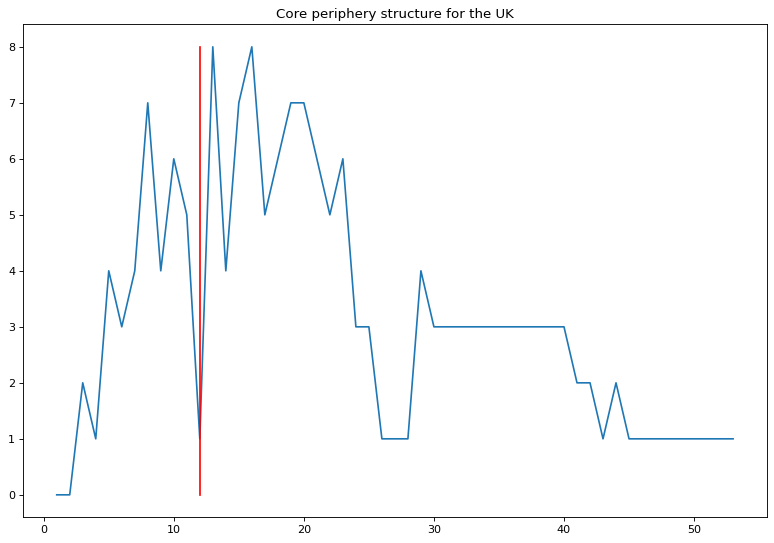

In [180]:

 
figure(figsize=(12 ,8), dpi=80)

# Initialize a list to store the values of k+ for each node
k_plus = []

# Compute the degree of each node
degrees = UK_sg.degree()

# Sort the nodes based on degree
sorted_nodes = sorted(degrees,key=lambda x: degrees[x[0]], reverse=True)

# Iterate over the sorted list of nodes
for node in sorted_nodes:

  # Get the list of neighbors for the current node
  neighbors = list(UK_sg.neighbors(node[0]))

  # Count the number of neighbors with a higher degree
  k_plus.append(sum([degrees[n] > degrees[node[0]] for n in neighbors]))

ranks = range(1, len(degrees)+1)
argmax= np.argmax(k_plus)
print('Core community size for the UK: ',ranks[argmax])

    # Store the core community for visualization 
UK_core_community = [s[0] for s in sorted_nodes[:argmax-1]]

    # Plot 
ax.plot(ranks, k_plus)
plt.plot(ranks, k_plus)
plt.plot([argmax, argmax], [0, 8], color='red')
plt.title('Core periphery structure for the UK')
 

ax.set_xlabel('Rank')
ax.set_ylabel('Number of connections to higher degree nodes')
title = 'Core periphery structure for the UK without smoothing'
ax.set_title(title)

 

# Show the plot
plt.savefig('CPS.png')
plt.show()


SMOOTHING


In [196]:
# Count the number of neighbors with a higher degree
k_plus.append(sum([degrees[n] > degrees[node[0]] for n in neighbors]))


    #     Smooth values averaging each value over 5 values
averaged_k_plus = np.convolve(k_plus, np.ones(5)/5, mode='valid')

    
ranks = range(1, len(averaged_k_plus)+1)

argmax= np.argmax(averaged_k_plus)

print('Core community size with our method for the UK :',ranks[argmax])


Core community size with our method for the UK : 15


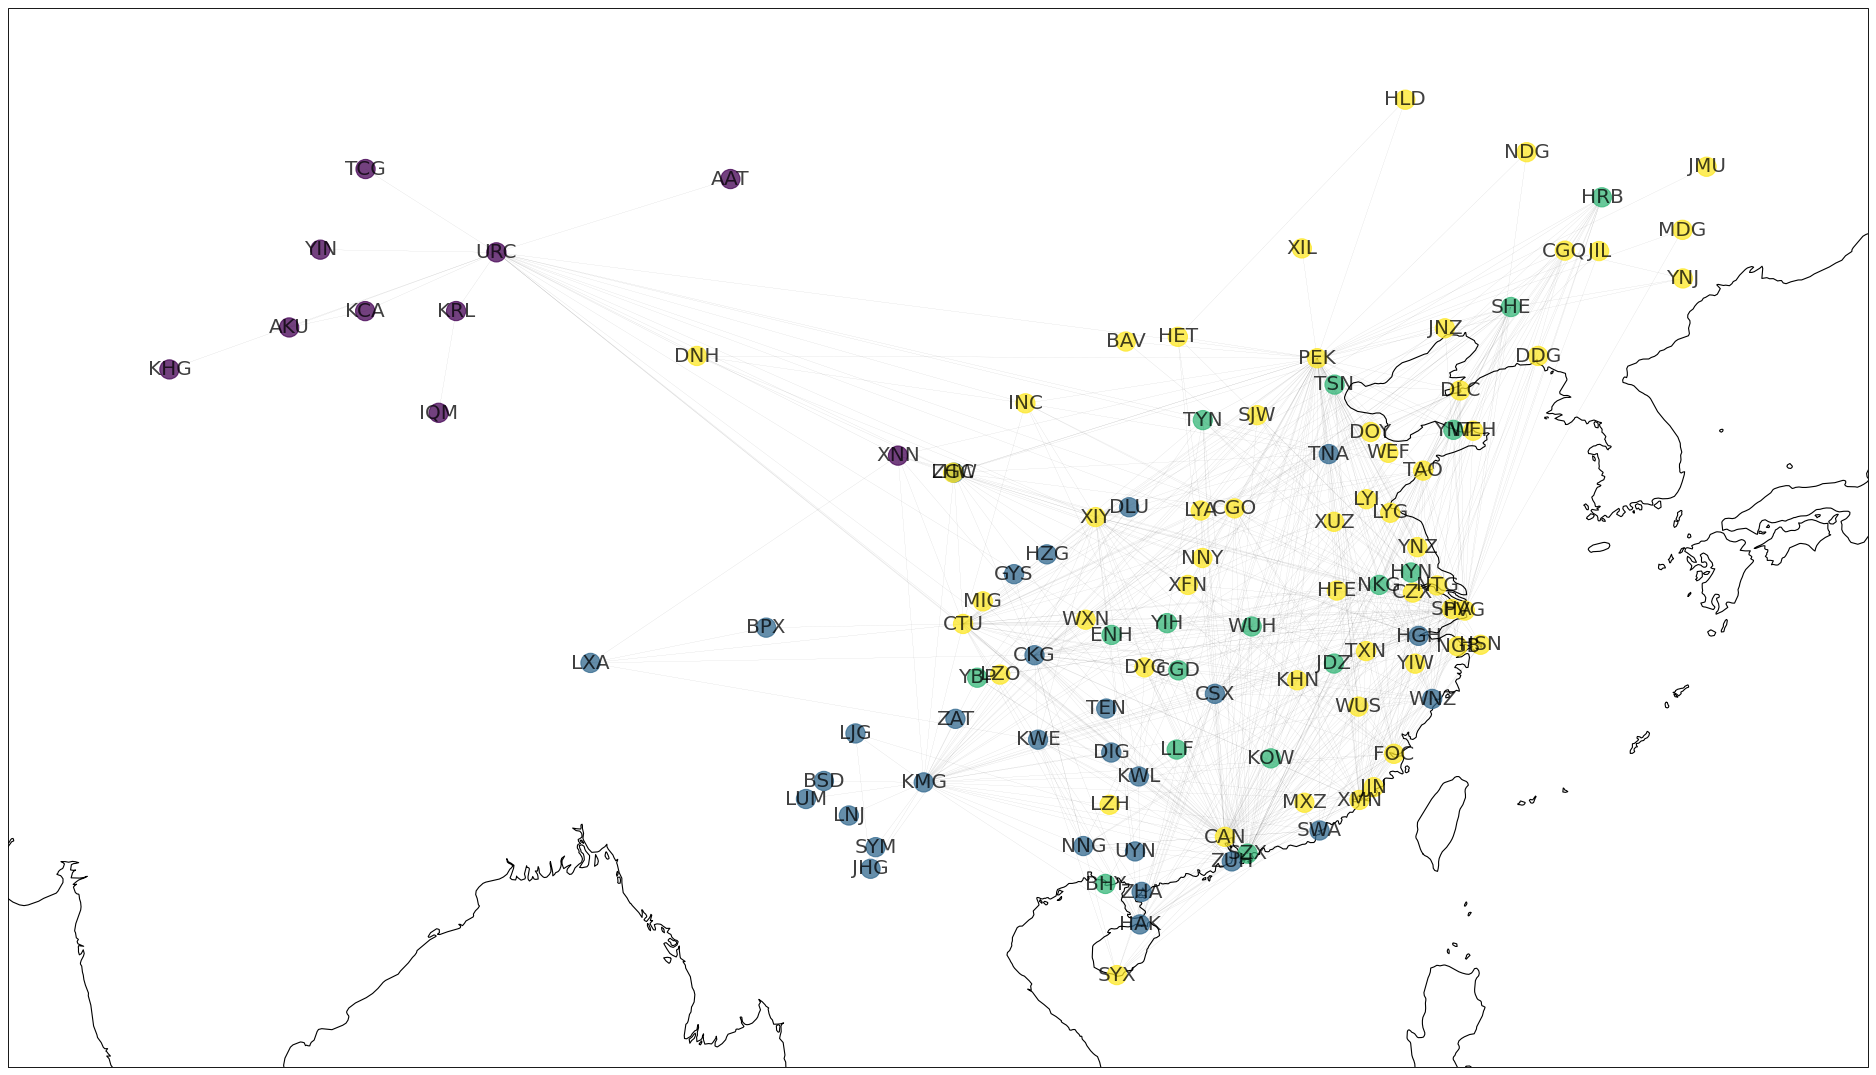

In [ ]:
colors = [int(cluster) for cluster in China_clusters]

from matplotlib.pyplot import figure

figure(figsize=(30,24), dpi=80)
crs = ccrs.PlateCarree()
ax= plt.axes(projection=crs)
ax.coastlines()
nx.draw_networkx(China_sg, ax=ax,
                     font_size=18,
                     alpha=.75,
                     width=.05,
                     #node_size=USA_sizes,
                     #labels=Australia_sizes,
                     pos=pos,
                     node_color=colors) 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


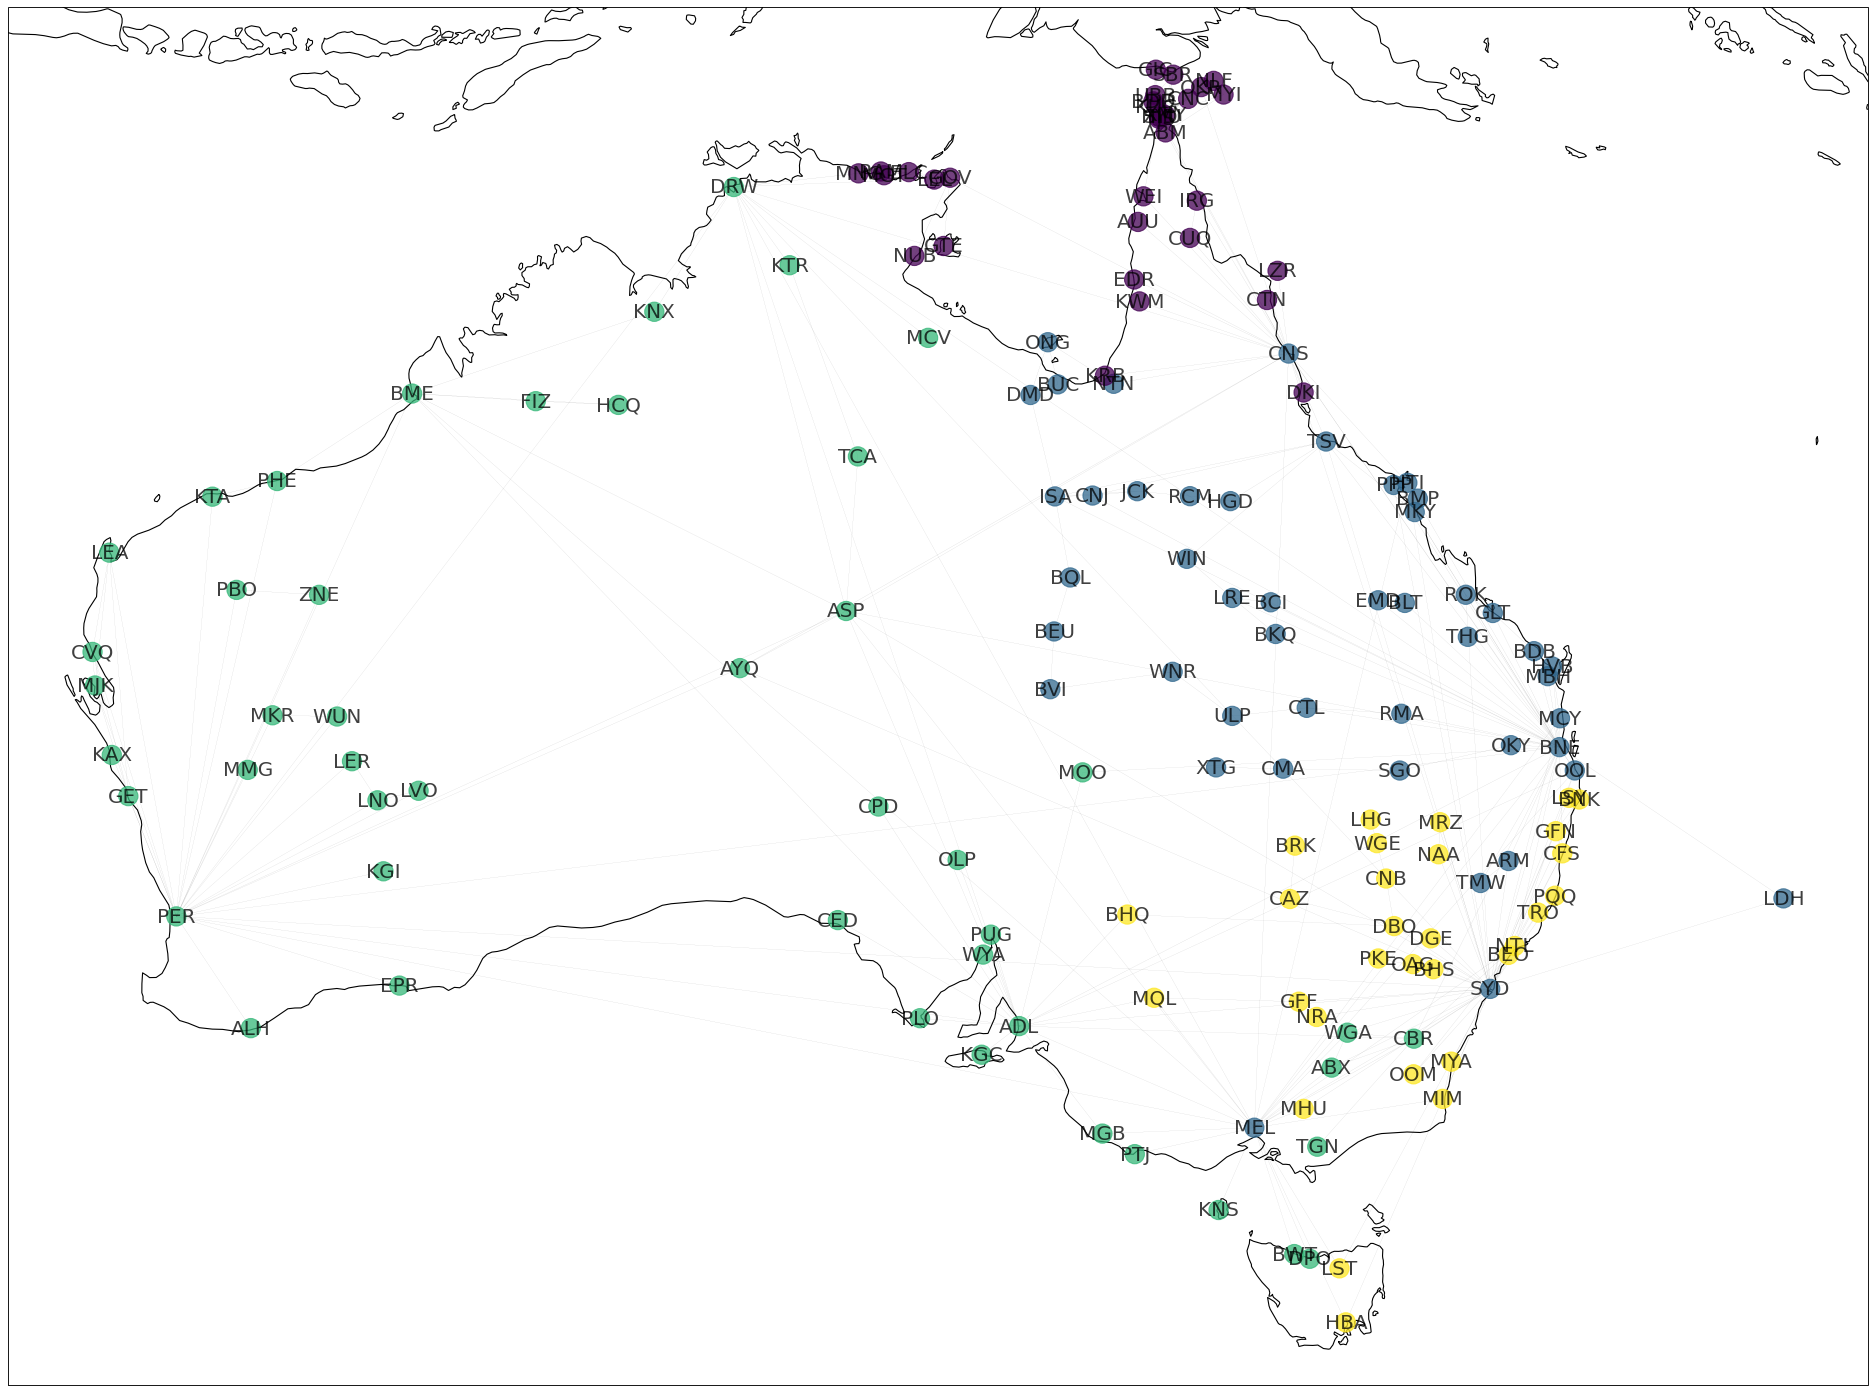

In [ ]:
colors = [int(cluster) for cluster in Australia_clusters]

from matplotlib.pyplot import figure

figure(figsize=(30,24), dpi=80)
crs = ccrs.PlateCarree()
ax= plt.axes(projection=crs)
ax.coastlines()
nx.draw_networkx(Australia_sg, ax=ax,
                     font_size=18,
                     alpha=.75,
                     width=.05,
                     #node_size=USA_sizes,
                     #labels=Australia_sizes,
                     pos=pos,
                     node_color=colors) 

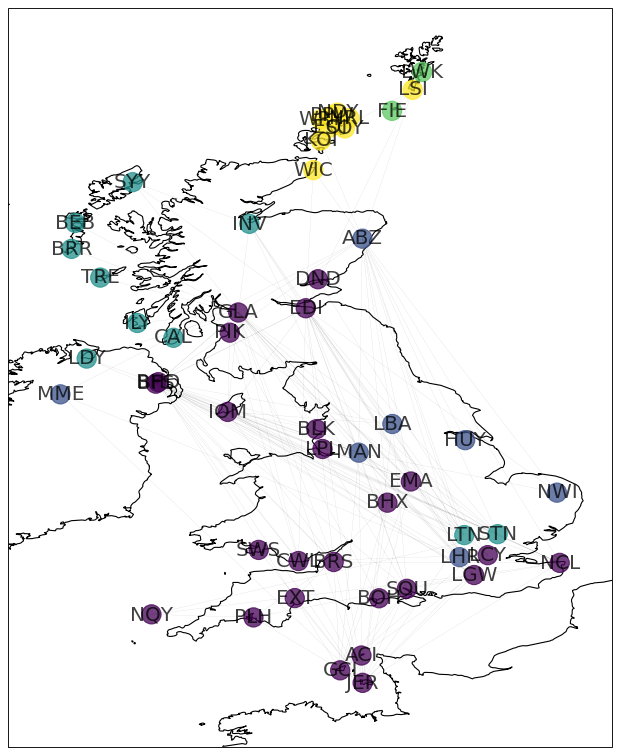

In [ ]:
colors = [int(cluster) for cluster in UK_clusters]

from matplotlib.pyplot import figure

figure(figsize=(18,12), dpi=80)
crs = ccrs.PlateCarree()
ax= plt.axes(projection=crs)
ax.coastlines()
nx.draw_networkx(UK_sg, ax=ax,
                     font_size=18,
                     alpha=.75,
                     width=.05,
                     #node_size=USA_sizes,
                     #labels=Australia_sizes,
                     pos=pos,
                     node_color=colors) 

Attempt unsuccessfull of the Louvain method

In [ ]:
import community as community_louvain
# Appliquer l'algorithme de Louvain pour identifier les clusters
UK_partition = community_louvain.best_partition(UK_sg)
USA_partition = community_louvain.best_partition(USA_sg)
China_partition = community_louvain.best_partition(China_sg)
Australia_partition = community_louvain.best_partition(Australia_sg)

# Calculer le degré de centralité pour chaque noeud du graphe
UK_degrees = nx.degree_centrality(UK_sg)
USA_degrees = nx.degree_centrality(USA_sg)
China_degrees = nx.degree_centrality(China_sg)
Australia_degrees = nx.degree_centrality(Australia_sg)



In [ ]:
# Pour chaque cluster, calculer la moyenne de degré de centralité de ses noeuds
UK_cluster_degrees = {}
for cluster in set(UK_partition.values()):
    nodes = [n for n in UK_partition if UK_partition[n] == cluster]
    UK_cluster_degrees[cluster] = sum([UK_degrees[n] for n in nodes]) /len(nodes)

# Identifier les clusters qui ont une moyenne de degré de centralité supérieure à un seuil
threshold = 0.15
central_clusters = [c for c in UK_cluster_degrees if UK_cluster_degrees[c] > threshold]

In [ ]:
# Pour chaque cluster, calculer la moyenne de degré de centralité de ses noeuds
USA_cluster_degrees = {}
for cluster in set(USA_partition.values()):
    nodes = [n for n in USA_partition if USA_partition[n] == cluster]
    USA_cluster_degrees[cluster] = sum([USA_degrees[n] for n in nodes]) / len(nodes)

# Identifier les clusters qui ont une moyenne de degré de centralité supérieure à un seuil
threshold = 0.15
central_clusters = [c for c in USA_cluster_degrees if USA_cluster_degrees[c] > threshold]

In [ ]:
# Pour chaque cluster, calculer la moyenne de degré de centralité de ses noeuds
China_cluster_degrees = {}
for cluster in set(China_partition.values()):
    nodes = [n for n in China_partition if China_partition[n] == cluster]
    China_cluster_degrees[cluster] = sum([China_degrees[n] for n in nodes]) / len(nodes)

# Identifier les clusters qui ont une moyenne de degré de centralité supérieure à un seuil
threshold = 0.15
central_clusters = [c for c in China_cluster_degrees if China_cluster_degrees[c] > threshold]

In [ ]:
# Pour chaque cluster, calculer la moyenne de degré de centralité de ses noeuds
Australia_cluster_degrees = {}
for cluster in set(Australia_partition.values()):
    nodes = [n for n in Australia_partition if Australia_partition[n] == cluster]
    Australia_cluster_degrees[cluster] = sum([Australia_degrees[n] for n in nodes]) / len(nodes)

# Identifier les clusters qui ont une moyenne de degré de centralité supérieure à un seuil
threshold = 0.15
central_clusters = [c for c in Australia_cluster_degrees if Australia_cluster_degrees[c] > threshold]

In [ ]:
UK_cluster_degrees

{0: 0.06993006993006995,
 1: 0.1495726495726496,
 2: 0.1826923076923077,
 3: 0.15236686390532544,
 4: 0.13653846153846155,
 5: 0.10256410256410257}

In [ ]:
USA_cluster_degrees

{0: 0.003584229390681004,
 1: 0.005766664148472716,
 2: 0.005337553724650493,
 3: 0.004371972113907599,
 4: 0.004794488665456411,
 5: 0.02503333839739366,
 6: 0.00665642601126472,
 7: 0.009269558769002593,
 8: 0.015201388473277887,
 9: 0.014907135874877839,
 10: 0.002304147465437788,
 11: 0.003584229390681004}

In [ ]:
China_cluster_degrees

{0: 0.058486238532110074,
 1: 0.07744198596869944,
 2: 0.114479457518947,
 3: 0.06745817593092282,
 4: 0.16467889908256886}

In [ ]:
Australia_cluster_degrees

{0: 0.021370967741935483,
 1: 0.028018433179723523,
 2: 0.024242424242424256,
 3: 0.03502304147465438,
 4: 0.011290322580645162,
 5: 0.017338709677419354,
 6: 0.023821339950372205,
 7: 0.024516129032258065}

In [ ]:
num_nodes = len(UK_sg)
UK_cluster_sizes = {c: v * num_nodes for c, v in UK_cluster_degrees.items()}

In [ ]:
UK_cluster_sizes

{0: 3.706293706293707,
 1: 7.9273504273504285,
 2: 9.682692307692308,
 3: 8.075443786982248,
 4: 7.236538461538462,
 5: 5.435897435897436}

In [ ]:
num_nodes = len(USA_sg)
USA_cluster_sizes = {c: v * num_nodes for c, v in USA_cluster_degrees.items()}
USA_cluster_sizes

{0: 2.3369175627240146,
 1: 3.759865024804211,
 2: 3.480085028472122,
 3: 2.850525818267754,
 4: 3.12600660987758,
 5: 16.321736635100667,
 6: 4.339989759344597,
 7: 6.043752317389691,
 8: 9.911305284577182,
 9: 9.719452590420351,
 10: 1.5023041474654377,
 11: 2.3369175627240146}